In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report,roc_curve, RocCurveDisplay, auc,precision_recall_curve, average_precision_score
import shap
import joblib
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')


# Data Loading and Cleaning

In [134]:
cust_churn = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [135]:
# print the first five rows of the table
cust_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
# see column names
cust_churn.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [137]:
# see column details
cust_churn.shape

(7043, 21)

In [138]:
cust_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [139]:
cust_id=cust_churn['customerID']

In [140]:
#customer ID doesnt matter, so drop it
cust_churn.drop(["customerID"], axis = 1, inplace=True) 

In [141]:
cust_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [142]:
# there is an empty string at position 488, so we need to set errors= coerce to convert it into nan.
cust_churn['TotalCharges'] = pd.to_numeric(cust_churn['TotalCharges'],errors="coerce")

In [143]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [144]:
cust_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [145]:
cust_churn.dropna(subset=['TotalCharges'], inplace=True)

In [146]:
cust_churn.shape

(7032, 20)

In [147]:
yes_no_cols= ["gender",'Dependents','Partner',"PhoneService",
              "PaperlessBilling","Churn"]
for col in yes_no_cols:
    cust_churn[col] = cust_churn[col].map({'Yes':1,'No': 0,'Male':1,'Female':0})

In [148]:
cust_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


# Exploratory Data Analysis and Data Preprocessing

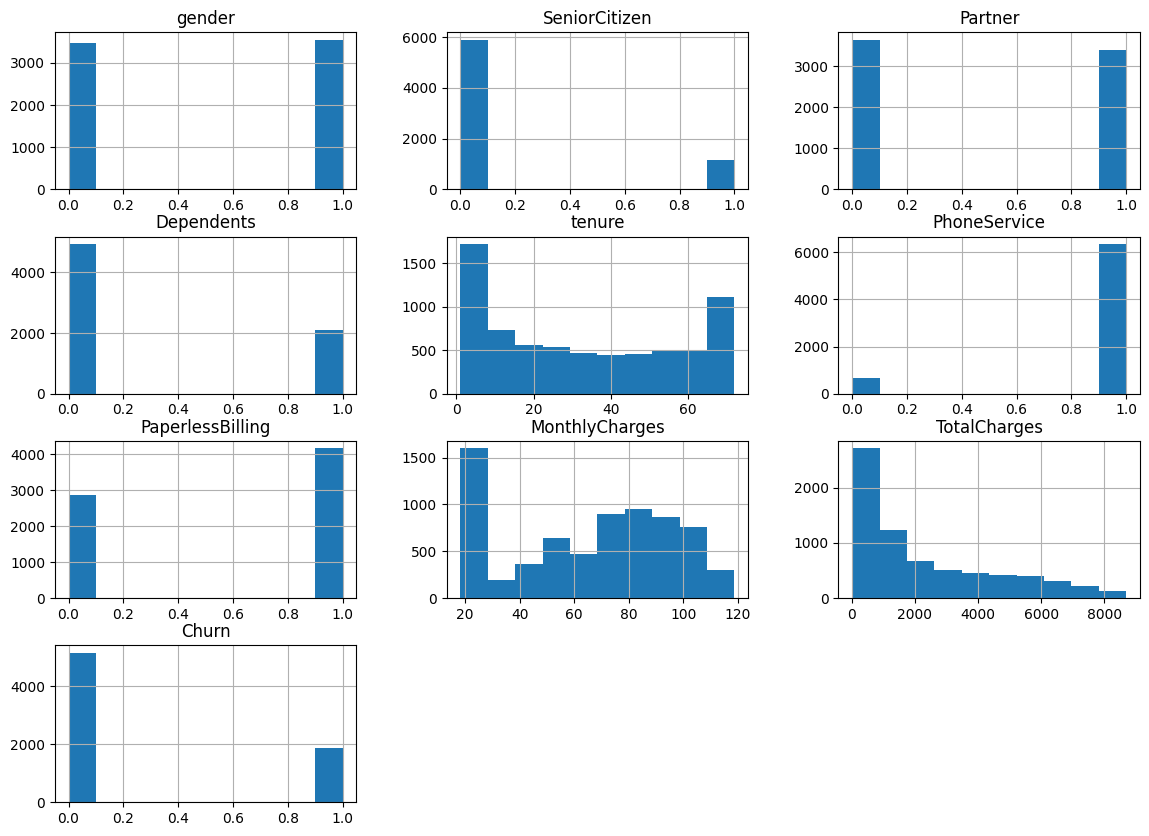

In [149]:
# Starting with histograms for each attributes
cust_churn.hist(figsize=(14, 10))
plt.show()

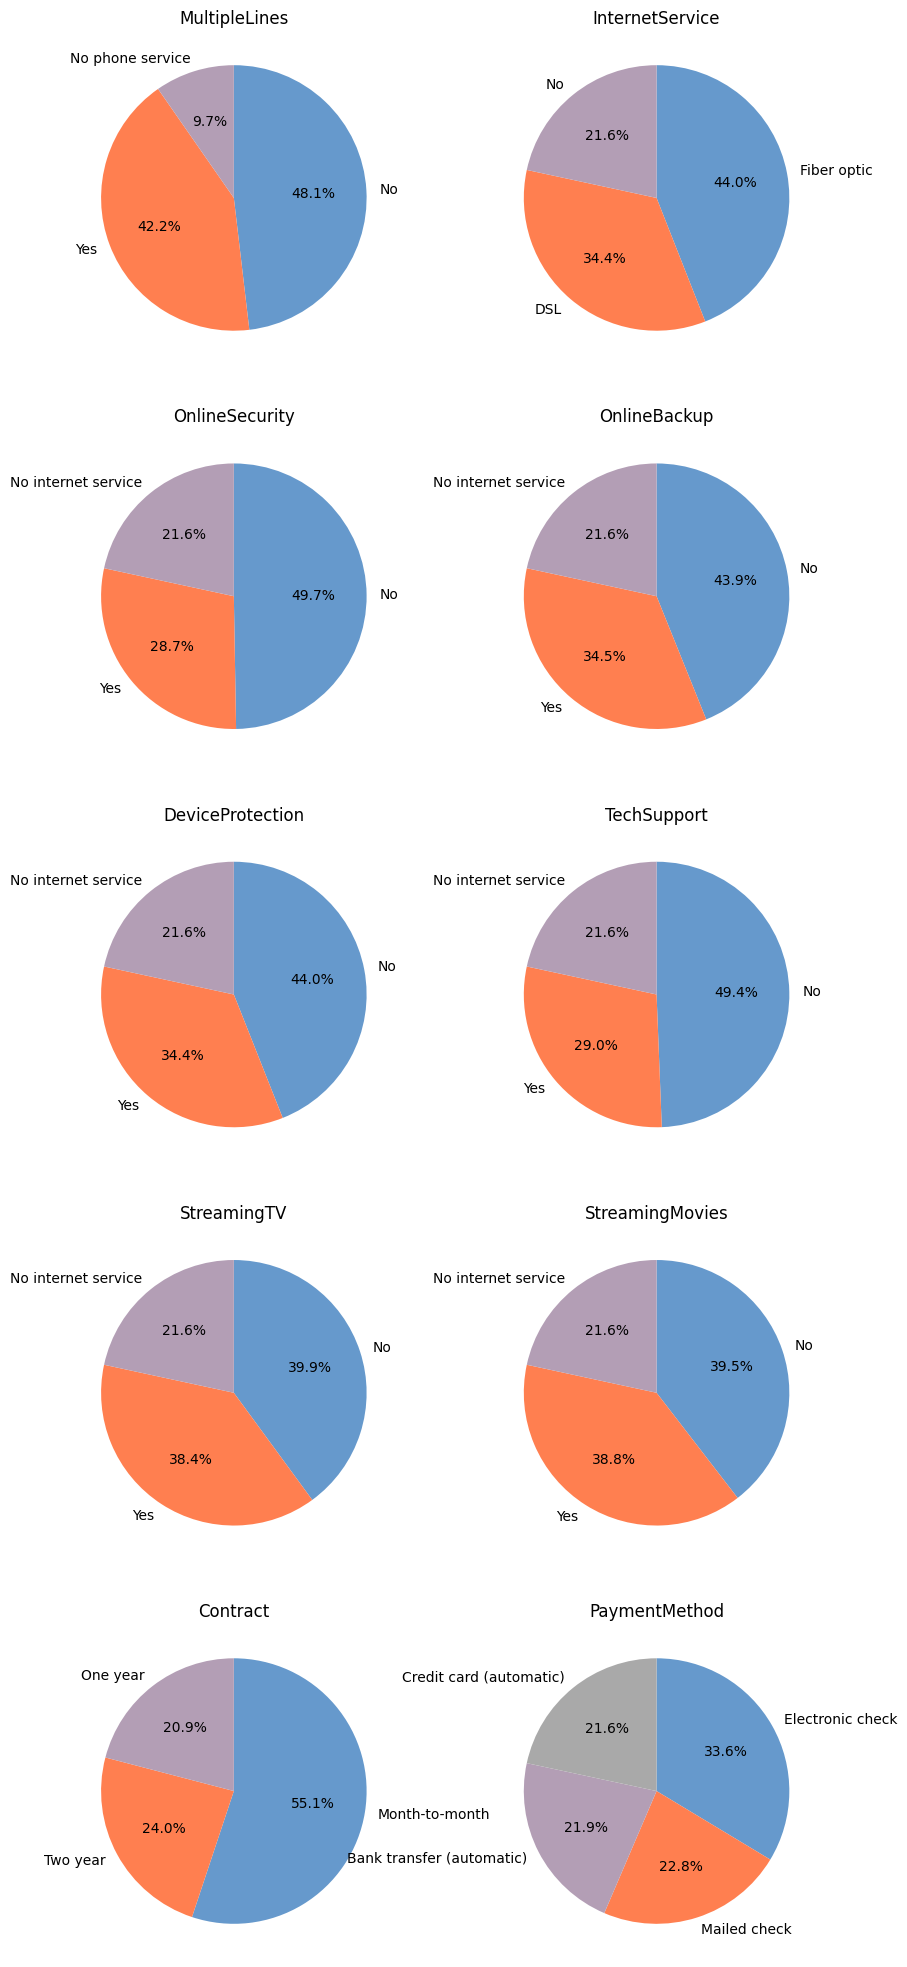

In [150]:
# Make pie charts to know the distributions for categorical variables

multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

colors = ['#6699CC', '#FF7F50', '#B39EB5', '#A9A9A9'] 


plt.figure(figsize=(10, 25))
for i, col in enumerate(multi_cat_cols, 1):
    plt.subplot(5, 2, i)
    cust_churn[col].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=colors,counterclock=False,shadow=False)
    plt.title(f'{col}')
    plt.ylabel('')  
plt.show()


The dataset has roughly equal proportions of male and female customers, as well as similar fractions of partnered and unpartnered individuals. Most customers have a phone connection. A larger number of people have opted for paperless billing compared to those who haven't, but this may not be a strong predictor of churn, which is something to keep in mind during evaluation.

TotalCharges and MonthlyCharges are capped around $20, which makes sense. Most customers appear to be on the lower end of the pricing range. The tenure distribution shows that many customers are new to the service, with the number decreasing and then plateauing for those who have stayed longer than 10 years.

About 26% of customers have churned, indicating class imbalance that may need to be addressed. Senior citizens represent a small portion of the customer base. It may be worth exploring whether there's a correlation between being a senior citizen and the likelihood of churn as in some cases, churn might be due to external factors like mortality.

MonthlyCharges and TotalCharges are not normally distributed.

From the pie charts of multi-category features:

 - Payment methods are relatively evenly distributed, though slightly more customers use electronic checks.

 - Only about 10% of customers lack a phone connection.

 - More than half are on month-to-month contracts, could be related to churning.

 - Approximately half of the customers do not use online security services, tech support, or device protection which are features that may be linked to churn risk and are worth further analysis.

Before evaluating further we need to split the dataset to avoid snooping bias. Since the dataset is imbalanced for the feature that we want to predict, we need to stratify split it to ensure the same fraction of churn. 

In [151]:
# first split into train and test+validation set
churn_train, churn_dumm = train_test_split(cust_churn,test_size=0.2, 
                                             stratify=cust_churn["Churn"],random_state=55)
# second split into test and validation
churn_test, churn_val = train_test_split(churn_dumm,test_size=0.5, 
                                             stratify=churn_dumm["Churn"],random_state=55)

In [152]:
# check if the proportion of male and female children for test, train and validation sets matches the original sample before proceeding.

churn_frac=pd.DataFrame({ 'Train': churn_train["Churn"].value_counts()/len(churn_train),
    'Validation': churn_val["Churn"].value_counts()/len(churn_val),
    'Test': churn_test["Churn"].value_counts()/len(churn_test),
    'Original': cust_churn["Churn"].value_counts()/len(cust_churn)})

churn_frac.index=['No','Yes']
churn_frac

,Train,Validation,Test,Original
No,0.734222,0.734375,0.733997,0.734215
Yes,0.265778,0.265625,0.266003,0.265785


Looks good!

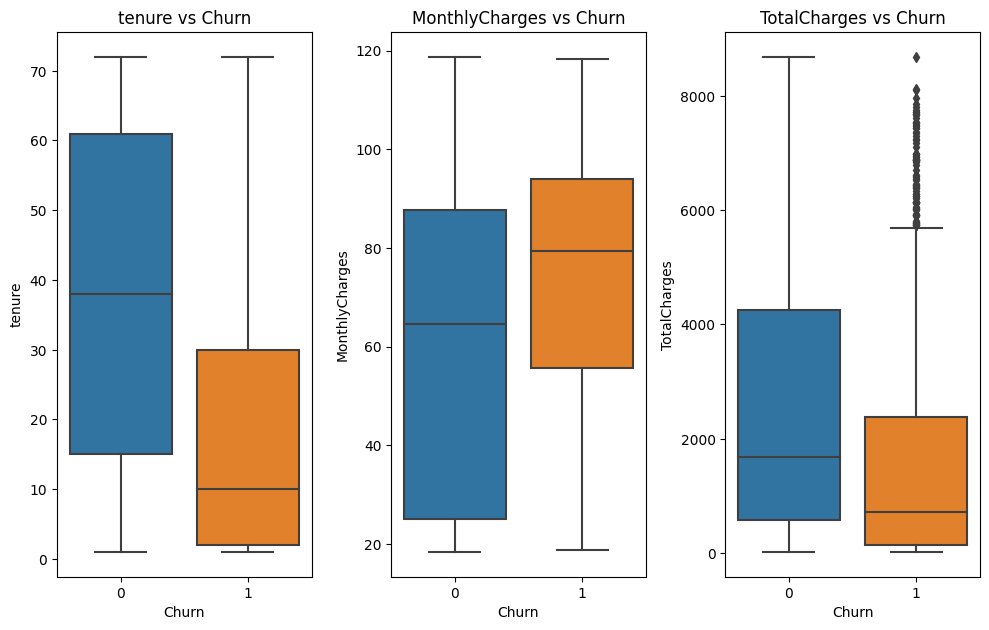

In [153]:
cont_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(10, 12))

for i, feature in enumerate(cont_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn', y=feature, data=churn_train)
    plt.title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()

Median tenure for customers who stay is high, whereas the median tenure for customers who churn is low ~10 months. Those who churn leave early. Looking at the monthly charges, the customers who are more likely to churn also tend to have higher monthly charges. May be they are on costlier plans. Total charges is a correlated feature since its basically a product of monthly charges and tenure. 

In [154]:
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 5599 to 5356
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   int64  
 1   SeniorCitizen     5625 non-null   int64  
 2   Partner           5625 non-null   int64  
 3   Dependents        5625 non-null   int64  
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   int64  
 6   MultipleLines     5625 non-null   object 
 7   InternetService   5625 non-null   object 
 8   OnlineSecurity    5625 non-null   object 
 9   OnlineBackup      5625 non-null   object 
 10  DeviceProtection  5625 non-null   object 
 11  TechSupport       5625 non-null   object 
 12  StreamingTV       5625 non-null   object 
 13  StreamingMovies   5625 non-null   object 
 14  Contract          5625 non-null   object 
 15  PaperlessBilling  5625 non-null   int64  
 16  PaymentMethod     5625 non-null   object 
 1

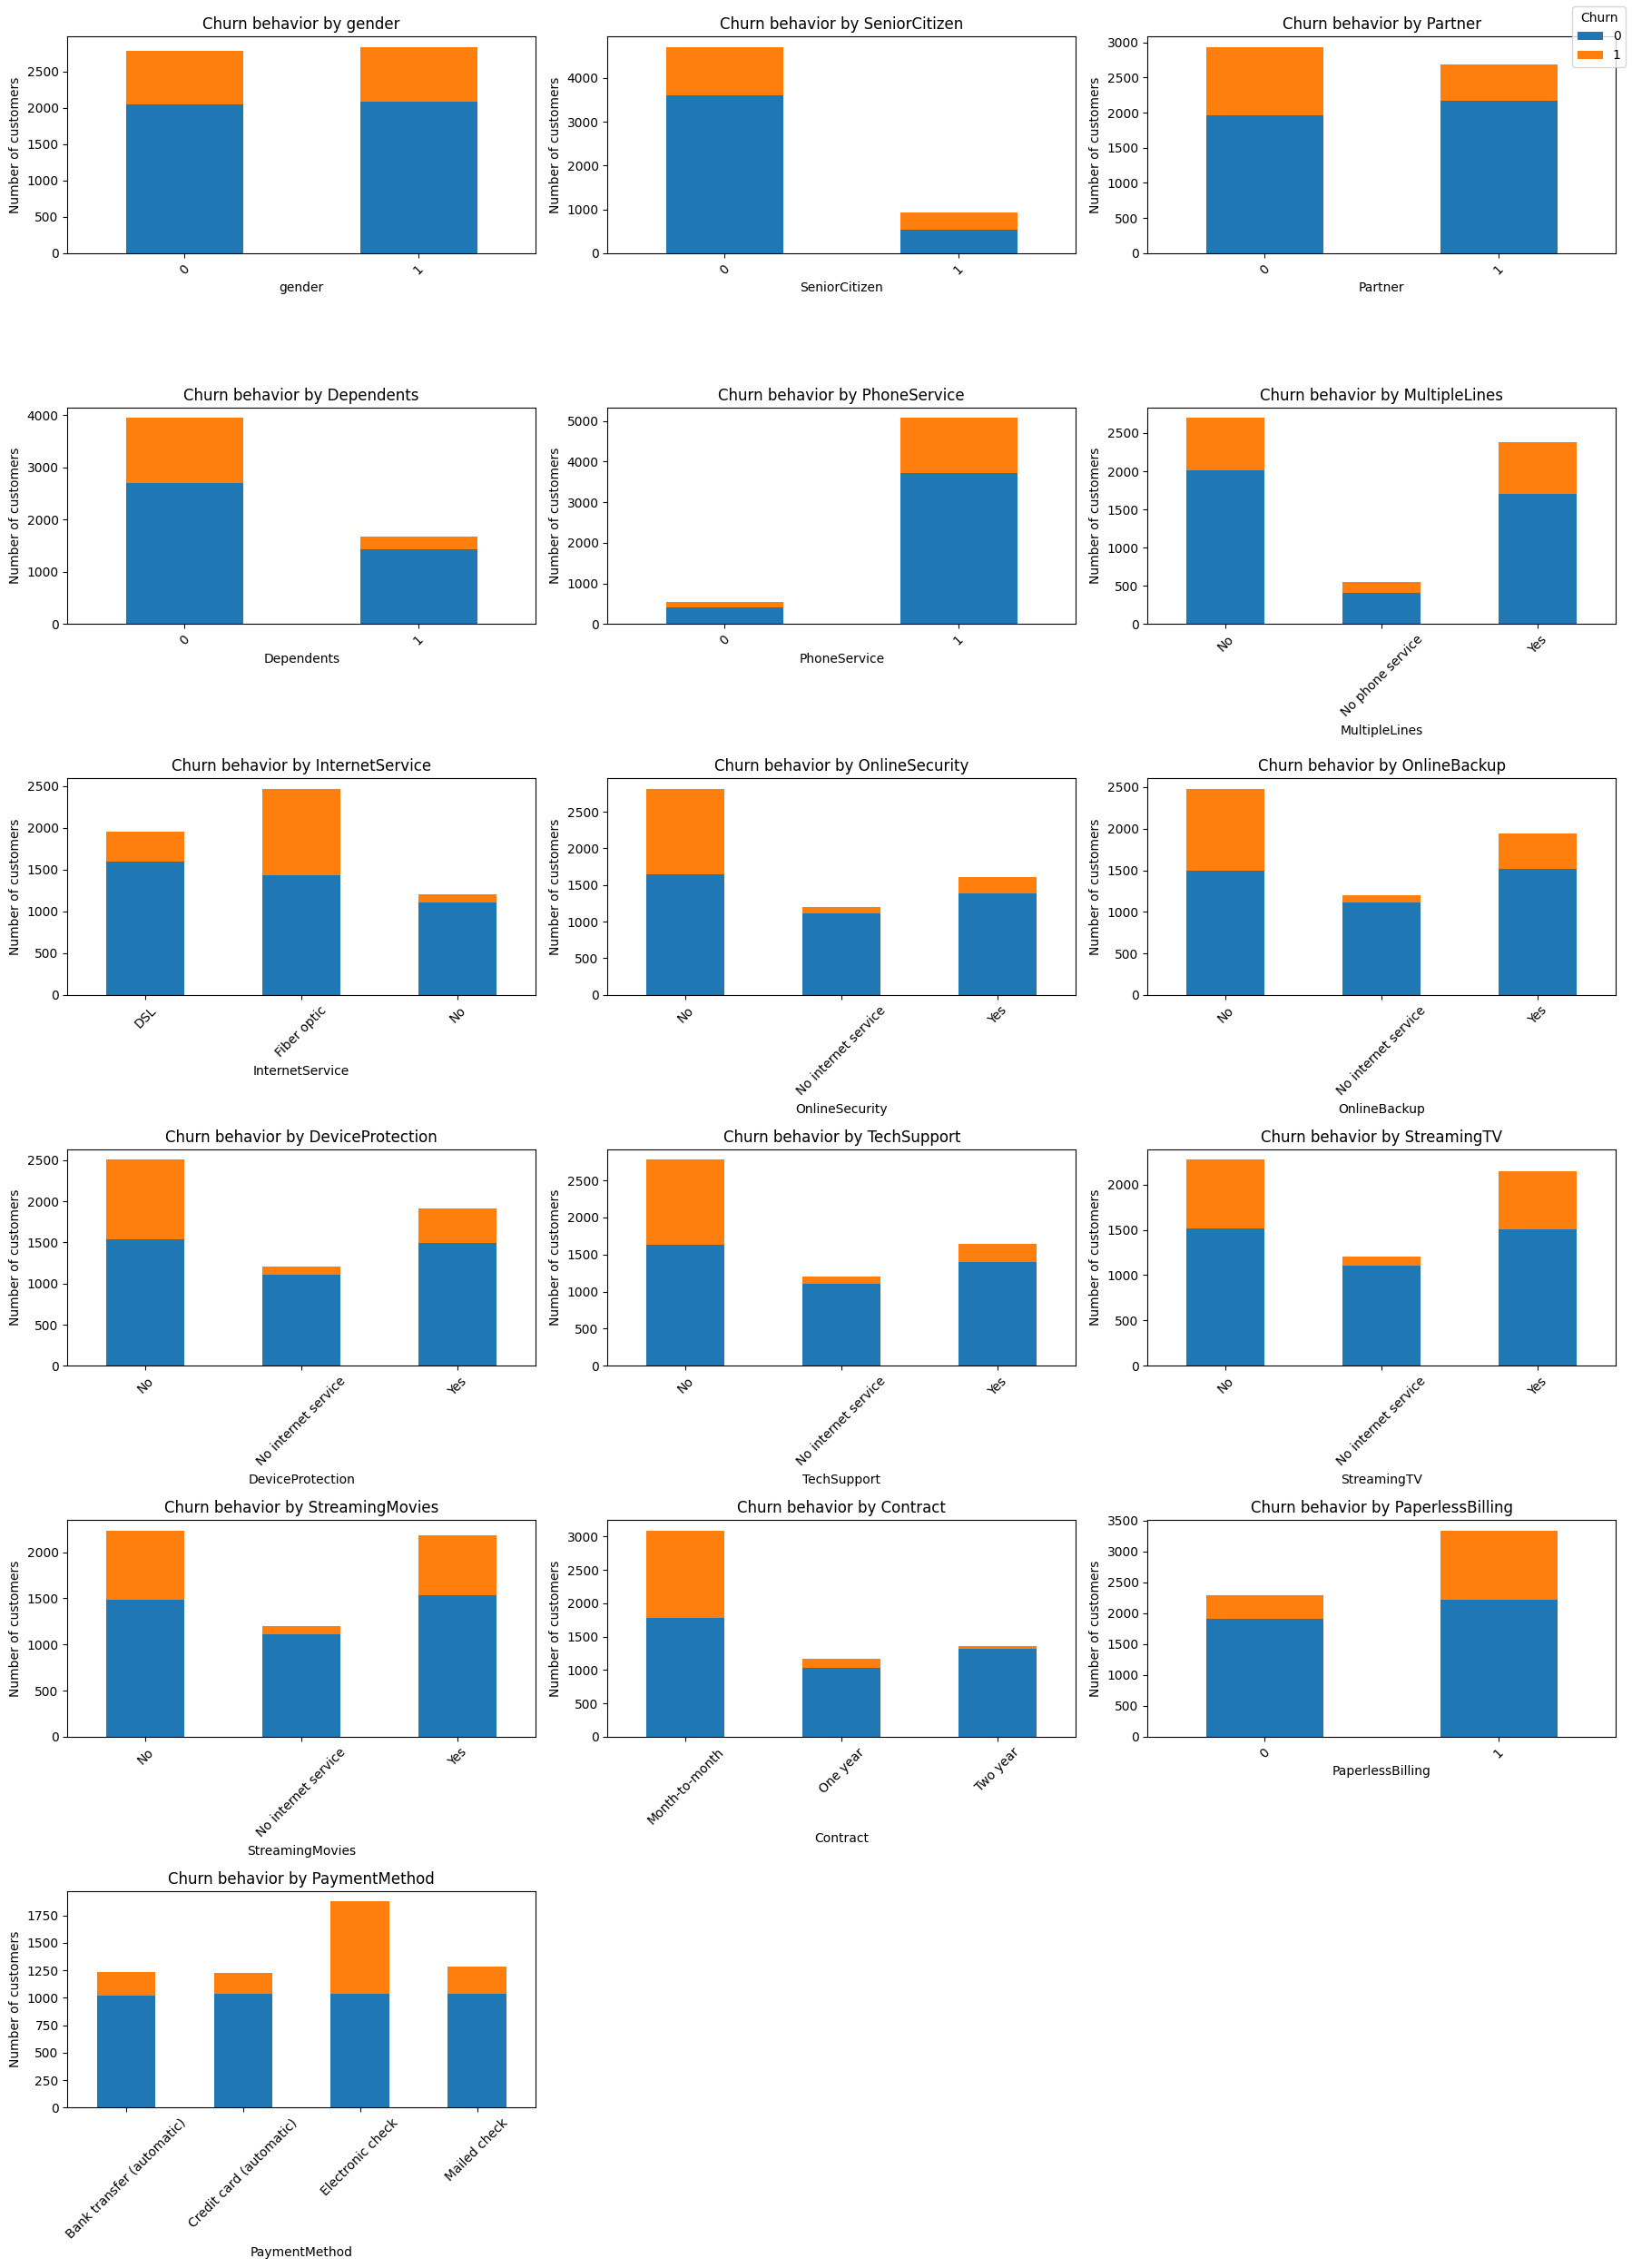

In [155]:
fig, axes = plt.subplots(6,3, figsize=(18,25))

axes = axes.flatten()
cat_cols=churn_train.select_dtypes(['object','int64']).columns
i=0
for col in cat_cols:
    if col not in ['Churn', 'tenure']:
        ct = pd.crosstab(churn_train[col], churn_train['Churn'])
        ct.plot(kind='bar', stacked=True, ax=axes[i], legend=False)
        axes[i].set_title(f'Churn behavior by {col}')
        axes[i].set_xlabel(f'{col}')
        axes[i].set_ylabel('Number of customers')
        axes[i].tick_params(axis='x', rotation=45)
        i += 1

    

# Hide unused axes
for j in range(i , len(axes)):
    fig.delaxes(axes[j])

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

From these bar graphs as a function of churn behavior we can derive the following insights:

- Gender: Churn rates appear similar for both males and females.

- Senior Citizens: Both senior and non-senior customers churn, so churn is likely not due to mortality alone.
 
- Partner/Dependents: Customers with partners or dependents show lower churn, which may indicate lifestyle-related churn factors.

- Contract Type: Month-to-month contracts are strongly associated with churn, suggesting that long-term contracts reduce customer attrition.

- Payment Method: Customers paying via electronic check churn more. This might reflect convenience preferences or demographic biases and should be tested further to rule out bias due to larger user volume.

- Paperless Billing: Those who opt in are more likely to churn. This might correlate with younger population who are more in touch with technology.

- Streaming Services: Streaming TV and movies show similar churn patterns, but neither appears to be a strong standalone predictor.

- Multiple Lines: No major difference in churn is seen across customers with or without multiple lines.

- Value-Added Services: Customers without device protection, online security, tech support, or online backup are more likely to churn. These may serve as retention hooks.

- Internet Service Type: Fibre optic users churn more. This may be related to churning due to higher monthly charges, as seen in previous boxplots.

We can use a chi-square test on categorical variables to evaluate whether there is a statistically significant association with churn. For numerical and binary variables, correlation analysis helps identify features that have a linear relationship with churn. However, correlation metrics only capture linear trends, so they may miss non-linear but important relationships. Therefore, while correlation can highlight potentially useful features, it shouldn't be the only criterion for dropping variables. 

In [156]:
from scipy.stats import chi2_contingency
chi2_results=[]
for col in churn_train.columns:
    if col == 'Churn':
        continue
    if churn_train[col].nunique() < 5:
        contingency = pd.crosstab(churn_train[col], churn_train['Churn'])
        chi2, p, dof, expected = chi2_contingency(contingency)
        chi2_results.append((col, p))

chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'p-value'])
chi2_df.sort_values('p-value', inplace=True)
chi2_df

,Feature,p-value
13,Contract,2.086327e-202
7,OnlineSecurity,5.345957e-147
10,TechSupport,1.456486e-139
6,InternetService,7.863311e-126
15,PaymentMethod,2.845965e-104
8,OnlineBackup,1.610770e-99
9,DeviceProtection,1.566098e-93
12,StreamingMovies,2.437732e-62
11,StreamingTV,5.008048e-62
14,PaperlessBilling,3.409926e-45


The results reaffirms our earlier inference from bar charts. `Gender`,`PhoneService` and `MultipleLines` seem statistically insignificant drivers of churn. On contrast, being a senior citizen or not is in fact a statistically significant feature.

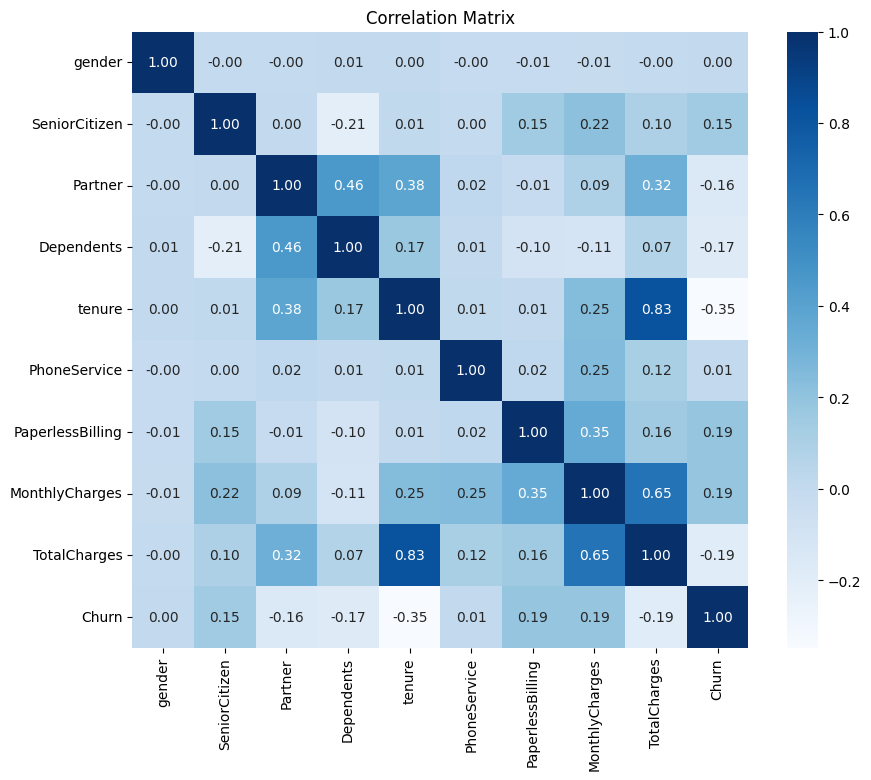

In [157]:
numeric_df = churn_train.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()


The correlation matrix further shows that there is a strong correlation between tenure and churning and it has a negative correlation. Meaning churners leave early if they want to leave. 

We can safely drop `gender`,`PhoneService` and `MultipleLines` for our further analysis. 

In [158]:
X_train=churn_train.drop(["Churn","gender","PhoneService","MultipleLines"],axis=1)
Y_train=churn_train['Churn']

One-hot encode the multi categorical columns for machine learning models:

In [159]:
X_train_onehot= pd.get_dummies(X_train,drop_first=True,dtype=int) # drop the first to avoid multicollinearity

In [160]:
X_train_onehot.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5599,0,1,0,9,1,94.85,890.60,1,0,0,...,1,0,1,0,0,0,0,0,0,1
2969,0,1,1,65,0,109.30,7337.55,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3238,0,1,1,26,0,19.65,494.90,0,1,1,...,0,1,0,1,0,0,1,1,0,0
1058,0,1,1,2,1,89.55,185.55,1,0,0,...,0,0,1,0,1,0,0,0,0,0
5280,0,1,1,33,1,79.15,2531.40,0,0,0,...,1,0,1,0,1,1,0,0,1,0


Do the same pre-processing for test and validation datasets as well:

In [161]:
X_val=churn_val.drop(["Churn","gender","PhoneService","MultipleLines"],axis=1)
X_val_onehot=pd.get_dummies(X_val,drop_first=True,dtype=int)
X_test=churn_test.drop(["Churn","gender","PhoneService","MultipleLines"],axis=1)
X_test_onehot=pd.get_dummies(X_test,drop_first=True,dtype=int)
Y_val=churn_val['Churn']
Y_test=churn_test['Churn']

#  Model Training & Evaluation

We can go for an ensemble methods as they perform better than the traditional logistic regression. Also they do not require feature scaling. They are better at capturing non-linear relationships between the features. Ensemble models also provide feature importance, helping us understand which variables influence predictions the most, making the decisions transparent.

I am going to use `RandomForestClassifier` from sklearn. I will start with `GridSearchCV` to figure out the best parameters and then use those to train the model. 

In [255]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':[50,100,150],'max_depth':[5, 10, 15],'min_samples_split':[2, 5,10],'min_samples_leaf':[5,10,15],'random_state':[15]}

grid_search = GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='f1',n_jobs=-1)
grid_search.fit(X_train_onehot,Y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 15}


In [162]:
model = RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf=10,min_samples_split=2,random_state=15)
model.fit(X_train_onehot, Y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=10, random_state=15)

In [163]:
print("Train Accuracy:", model.score(X_train_onehot,Y_train))
print("Validation Accuracy:", model.score(X_val_onehot,Y_val))

Train Accuracy: 0.8300444444444445
Validation Accuracy: 0.8181818181818182


There is a slight overfitting since train accuracy is greater than validation accuracy, so we can tune it again.

In [258]:

param_grid = {'n_estimators':[50],'max_depth':[6,8],'min_samples_split':[10],'min_samples_leaf':[5]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=15),param_grid,cv=5,scoring='f1',n_jobs=-1)
grid_search.fit(X_train_onehot,Y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [164]:
model = RandomForestClassifier(n_estimators=50,max_depth=8,min_samples_leaf=5,min_samples_split=10,random_state=15)
model.fit(X_train_onehot, Y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50, random_state=15)

In [165]:
print("Train Accuracy:", model.score(X_train_onehot,Y_train))
print("Validation Accuracy:", model.score(X_val_onehot,Y_val))


Train Accuracy: 0.8206222222222223
Validation Accuracy: 0.8224431818181818


Model is generalizing well. Both training and validation datasets seem to have similar accuracy level of ~82%. On the train set, the model acheived 81.2%. This is a good baseline.

However, in this problem there is a class imbalance. The number of churners were comparatively smaller than the non-churners. So accuracy can be misleading.


We can look at the classification reports to understand the model performance better.

In [166]:
y_pred = model.predict(X_val_onehot)
print("For the validation dataset:")
print(classification_report(Y_val, y_pred))

For the validation dataset:
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       517
           1       0.72      0.53      0.62       187

    accuracy                           0.82       704
   macro avg       0.79      0.73      0.75       704
weighted avg       0.81      0.82      0.81       704



From the validation classification report we can conclude the following:

- For non churners
    - recall is more than 90% ; meaning the model is catching more than 90% of non-churners.
    - Precision is close to 85%; meaning 85% of predicted non-churners are actually non-churners.
    - F1 score of 0.88 shows an overall good performance

- For churners:
     - recall is around 53%; model is catching only 53% of churners. We are missing a lot of actual churners :(
     - Precison is close to 70%; meaning 70% of predicted churners are actually churners.
     - F1 score is 62% signaling room for improvement.


This model is biased towards non-churners than churners. 

From a business perspective, what we need is high recall for churners. We don't have to care too much about precision, but still need a decent precision to reduce false positives. We can try by setting `class_weight` to `balanced` in the classifier and try this again. 

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [50,100],'max_depth': [5, 10, 15],'min_samples_split': [2, 5,10],'min_samples_leaf':[5,10,15]}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'),param_grid,cv=5,scoring='recall',n_jobs=-1)
grid_search.fit(X_train_onehot,Y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}


In [168]:
model = RandomForestClassifier(class_weight='balanced',n_estimators=50,max_depth=5,min_samples_leaf=10,min_samples_split=10,random_state=15)
model.fit(X_train_onehot, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=50, random_state=15)

In [169]:
print("Train Accuracy:", model.score(X_train_onehot,Y_train))
print("Validation Accuracy:", model.score(X_val_onehot,Y_val))


Train Accuracy: 0.7415111111111111
Validation Accuracy: 0.7599431818181818


In [170]:
y_pred = model.predict(X_val_onehot)
print("For the validation dataset:")
print(classification_report(Y_val, y_pred))

For the validation dataset:
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       517
           1       0.53      0.86      0.65       187

    accuracy                           0.76       704
   macro avg       0.73      0.79      0.74       704
weighted avg       0.83      0.76      0.77       704



This is pretty good from a business perspective! 

Model Performance:

    Train Accuracy: 74.3%

    Validation Accuracy: 76%

    Test Accuracy: 74.5%

Key Metrics from the Test set for churners:

    Churn Recall: 0.86

    Churn Precision: 0.53

    F1-Score (class 1): 0.65

The model effectively captures churners (i.e., recall of 86%), which is great from a business retention perspective. But there is a trade-off. There are high false-positives here since our precision for churners is low. So some loyal customers will be misclassified as churners, which in this use case is acceptable. The model also don't show signs of overfitting, so it generalizes well across train, validation, and test sets. 

We can further tweak the model recall by manually setting class weights and thereby giving more weights to the churners. But since we are already around 50% precision for churners, i.e one in every predicted churners can be non-churners, we need to make sure the precision isn't compromised further.

In [171]:
class_weight = {0: 1, 1: 3}  #manually set class weights to account for class imbalance.

param_grid = {'n_estimators': [50,100],'max_depth': [5,10,15],'min_samples_split': [2,5,10],'min_samples_leaf':[5,10]}
grid_search = GridSearchCV(RandomForestClassifier(class_weight=class_weight),param_grid,cv=5,scoring='recall',n_jobs=-1)
grid_search.fit(X_train_onehot,Y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [172]:
model = RandomForestClassifier(class_weight=class_weight,n_estimators=100,max_depth=5,min_samples_leaf=5,min_samples_split=5,random_state=15)
model.fit(X_train_onehot, Y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=5,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=15)

In [173]:
print("Train Accuracy:", model.score(X_train_onehot,Y_train))
print("Validation Accuracy:", model.score(X_val_onehot,Y_val))

Train Accuracy: 0.7342222222222222
Validation Accuracy: 0.7485795454545454


In [174]:
y_pred = model.predict(X_val_onehot)
print("For the validation dataset:")
print(classification_report(Y_val, y_pred))

For the validation dataset:
              precision    recall  f1-score   support

           0       0.94      0.71      0.80       517
           1       0.52      0.87      0.65       187

    accuracy                           0.75       704
   macro avg       0.73      0.79      0.73       704
weighted avg       0.82      0.75      0.76       704



Tweaking class weights to address class imbalance improved the model’s recall for churners from 84% to 87% on the validation dataset, without compromising precision (~50%). While a 50% precision means half of the flagged churners may not actually churn, this trade-off could still be acceptable, especially if the cost of losing a customer outweighs the cost of retention efforts. 


### Cost Benefit Analysis of the Model

In [175]:
Y_val_df= pd.DataFrame(Y_val, columns=['Churn'])
num_churners=len(Y_val_df[Y_val_df['Churn']==1])
projected_loss_val= X_val_onehot[Y_val_df['Churn']==1]['MonthlyCharges'].sum() * 12

print(f"Total number of actual churners: {round(num_churners)}")
print(f"Estimated revenue loss over 12 months due to actual churners: ${round(projected_loss_val)}")
print(f"Average revenue loss per churner: ${round(projected_loss_val/num_churners)}")

Total number of actual churners: 187
Estimated revenue loss over 12 months due to actual churners: $171593
Average revenue loss per churner: $918


In [176]:
Y_val_df_pred= pd.DataFrame(y_pred, columns=['Churn_pred'])
pred_churners=len(Y_val_df_pred[Y_val_df_pred['Churn_pred']==1])
print(f"Total number of predicted churners: {round(pred_churners)}")

Total number of predicted churners: 314


We can try to understand these metrics from a business standpoint. 

Model's wins or true positives:

- The recall is 0.87. Out of all the actual positive cases, the model correctly idenfies churners 87% of the time. And the number of actual churners in the dataset is 187. So if the model identifies 87% of those (163 customers), **the potential revenue saved by the model = 0.87 * 187 * 918 = $149349.**

Model's losses or false negatives:
- **The cost of missed churners by the model = (1-0.87) * 187 * 918 = $22316.5**

Model's costs or false positives:

- TThe model maintains high recall (0.87), but this comes at the cost of precision (0.50), meaning 50% of flagged churners are actually non-churners. We need to find false positives here. False positives = Total predicted churners-True positves.
So, 314-163 = 151 customers could be falsely flagged as churners.

So lets say the cost of retention efforts per customer could range from USD 5 to USD 50 on average in terms of offers, bundled plans etc. We can use the upper limit to find the maximum cost for retention effort per customer.

So, **the total cost of false positives = 50 * 151 = $7550**

Net profit for the company:

- **Net profit = Estimated revenue saved - total cost of false positives = 149349 - 7550 = $141799**

ROI (Return on Investment) aka how much profit you're getting compared to how much you spent:

- **ROI = (Net profit)/total cost of false positives = 141799/7550 = $18.78**

**ROI suggests that for every 1 USD spent for retention efforts the business saves about 18.78 USD in revenue, which is good!**

This looks good for the problem at hand. However, one can try to increase the threshold from 0.5 for a better precision at the cost of less recall. We are assuming the Customer Lifetime Value is really high compared to the retention effort. 


The following table summarizes our findings:

| Metric                             | Value        |
| ---------------------------------- | ---------    |
| Recall                             | 0.87         |
| Precision                          | 0.52         |
| Revenue Saved (TP)                 | \$149349     |
| Cost of Missed Churners (FN)       | \$22316.5    |
| Cost of Unnecessary Retention (FP) | \$7550       |
| Net Revenue Retained               | \$141799     |
| ROI                                | \~19x        |




Now we can make predictions on the test set.

### Make predictions on the test dataset

In [177]:
y_pred_test = model.predict(X_test_onehot)

print("For the test dataset:")
print("Accuracy:", model.score(X_test_onehot,Y_test))
print("Classification Report:")
print(classification_report(Y_test, y_pred_test))

For the test dataset:
Accuracy: 0.7297297297297297
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.79       516
           1       0.50      0.87      0.63       187

    accuracy                           0.73       703
   macro avg       0.71      0.77      0.71       703
weighted avg       0.82      0.73      0.75       703



Let's look at the model performance by plotting ROC curve and precion recall curve.

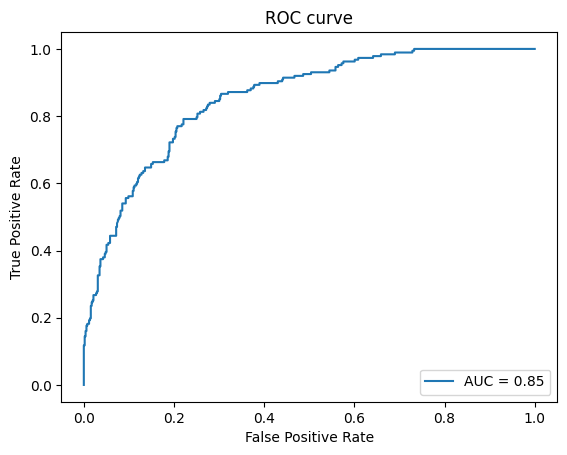

In [178]:
y_prob_test = model.predict_proba(X_test_onehot)[:, 1] 
fpr, tpr, thresholds = roc_curve(Y_test, y_prob_test)
roc_auc =auc(fpr, tpr)
disp=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
disp.plot()
plt.title("ROC curve")
plt.show()

The ROC AUC score tells us how well the model ranks churners above non-churners. So an AUC of 0.85 means there is an 85% chance the model ranks churners above non-churners. This means that the model can rank customers by churn risk accurately. 

But, since the ROC curve considers both classes equally, it tends to overestimate performance on imbalanced datasets. So this is not a reliable metric for our case since our dataset is imbalanced.

In our case, churners are a minority class, so we also plot the Precision-Recall curve, which focuses only on the churners which is the positive class. It helps us answer the question `Out of the customers you labelled as churners, how many actually churn?`. This shows more realistically how well the model finds churners without flagging too many loyal customers.

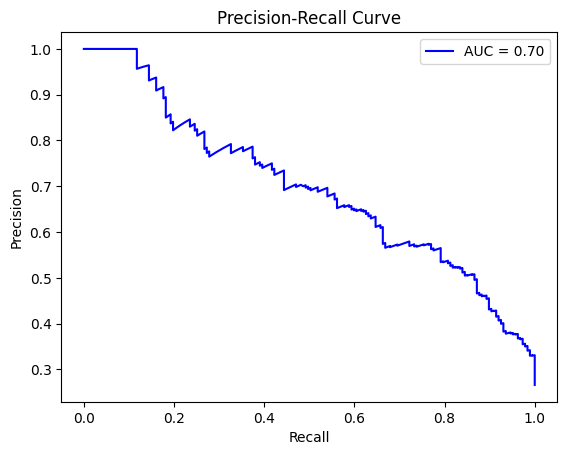

In [179]:
p,r,t = precision_recall_curve(Y_test, y_prob_test)
pr_score = average_precision_score(Y_test, y_prob_test)
plt.plot(r, p, color='blue', label=f'AUC = {pr_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [180]:
# Percentage of churners and non-churners in the dataset
Y_train.value_counts()/len(Y_train)

Churn
0    0.734222
1    0.265778
Name: count, dtype: float64

If the model were just guessing, we’d expect a precision of about 26.5%, since that’s the churn rate. But our Precision-Recall AUC is 70%, which shows the model is doing much better than random. The curve starts dropping after around 40% recall, meaning the model is good at catching the most obvious churners, but as it tries to find more, it makes more mistakes. This is a direct consequence of prioritizing high recall in our model. Unless the retention actions are particularly costly, the current model performance is acceptable and actionable.

We can save this model as a pickle file:

In [181]:
joblib.dump(model,'randomforestclassifier_churn_model.pkl')

['randomforestclassifier_churn_model.pkl']

# Model Explainability with SHAP

We can look at the top 5 features which is driving the model decisions:

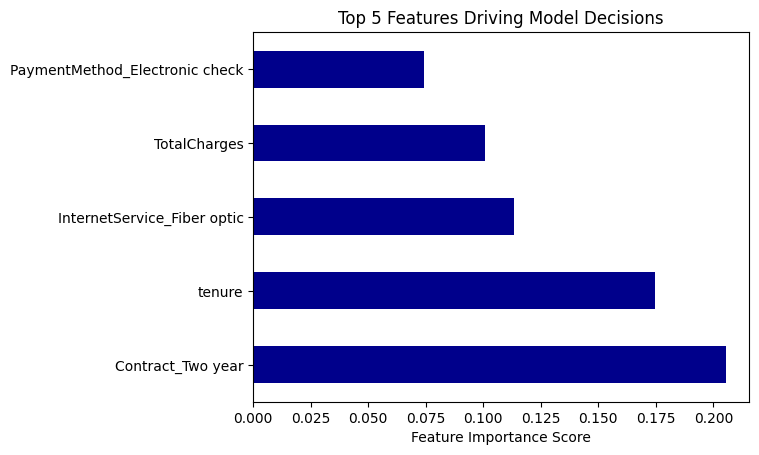

In [182]:
feat_imp = model.feature_importances_
feat_names = X_train_onehot.columns
imp = pd.Series(feat_imp, index=feat_names)
imp.nlargest(5).plot(kind='barh',color='darkblue')
plt.title("Top 5 Features Driving Model Decisions")
plt.xlabel('Feature Importance Score')
plt.show()


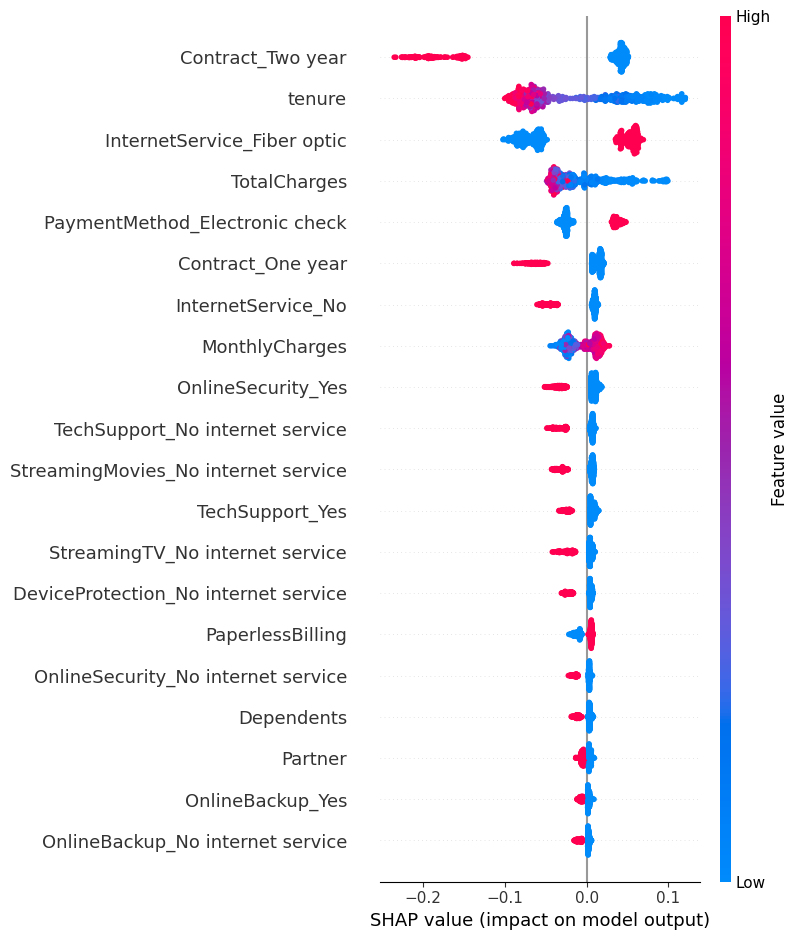

In [183]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_onehot)
shap.summary_plot(shap_values[1], X_test_onehot)
plt.savefig("shap_beeswarm.png", bbox_inches='tight', dpi=300)
plt.close()

This is a SHAP summary plot (beeswarm) showing the global importance of each feature in predicting churn.

On the Y-axis, features are ranked by their overall impact on the model's predictions (top = most important). The first five seems to be the most significant features the model used on a global scale to make the predictions with the contract chosen by the customer being the strongest predictor.

Each dot represents one customer. The SHAP value shows how much that feature influenced the model’s prediction for that customer:

  - Dots to the right (positive values) pushed the prediction toward churn. 
  - Dots to the left (negative values) pushed it away from churn.
    
The color shows the actual value of the feature for that customer:

  - Red = high feature value (e.g., long tenure)
  - Blue = low feature value (e.g., short tenure)

So for example: Large `Tenure` seems to drive the predictions away from churn since red region is towards the negative. Short `Tenure` seems to drive predictions towards the churn since the blue region is towards the positive.

The overall horizontal length of a feature is also important. The wider the spread of dots for a feature, the more it influenced different customers' predictions. Meaning the model relied on that feature more often. For eg: `Contract_Two year` seems to be used by the model more often to make predictions for non-churners. 


Lets now plot for a couple of customers their local SHAP summary plot to understand what drove them to churn.

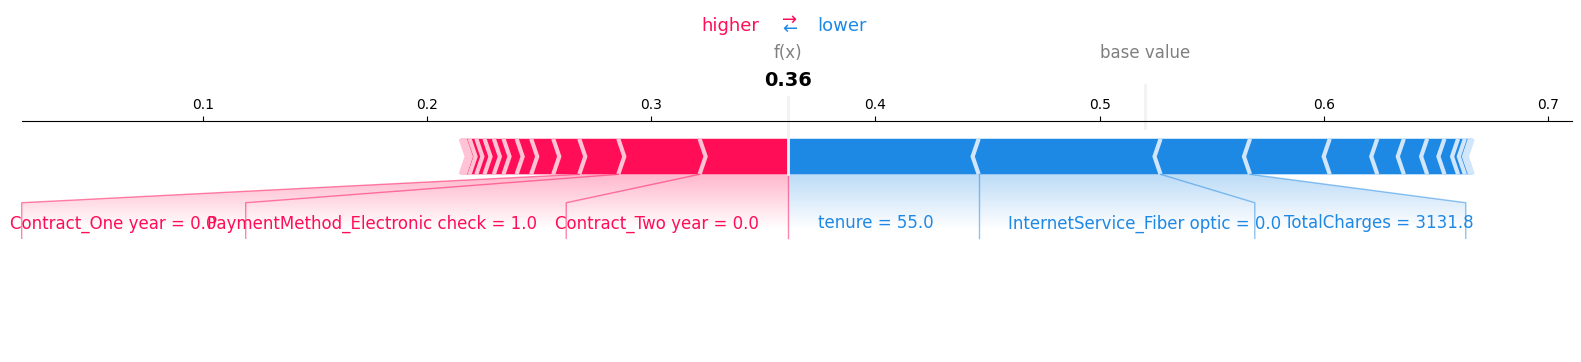

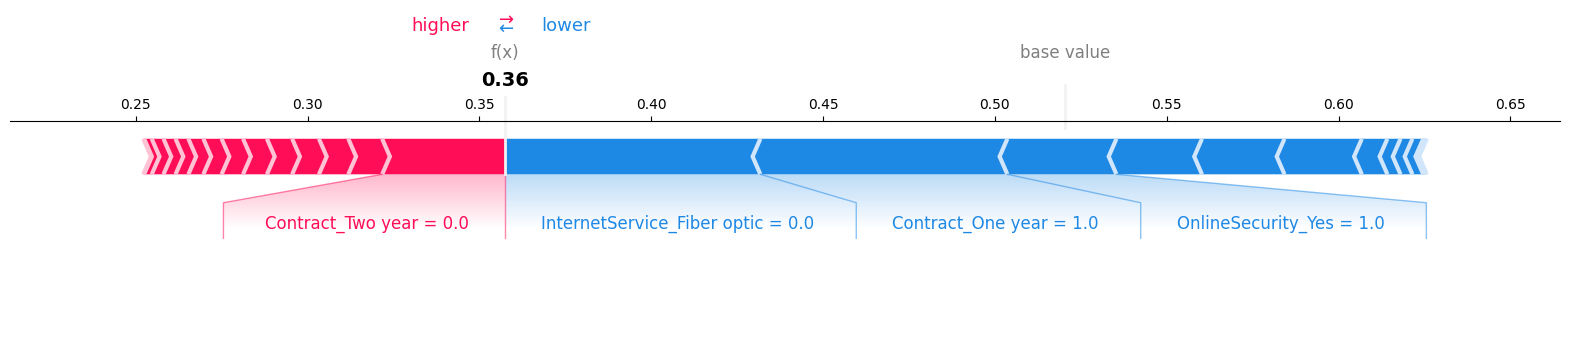

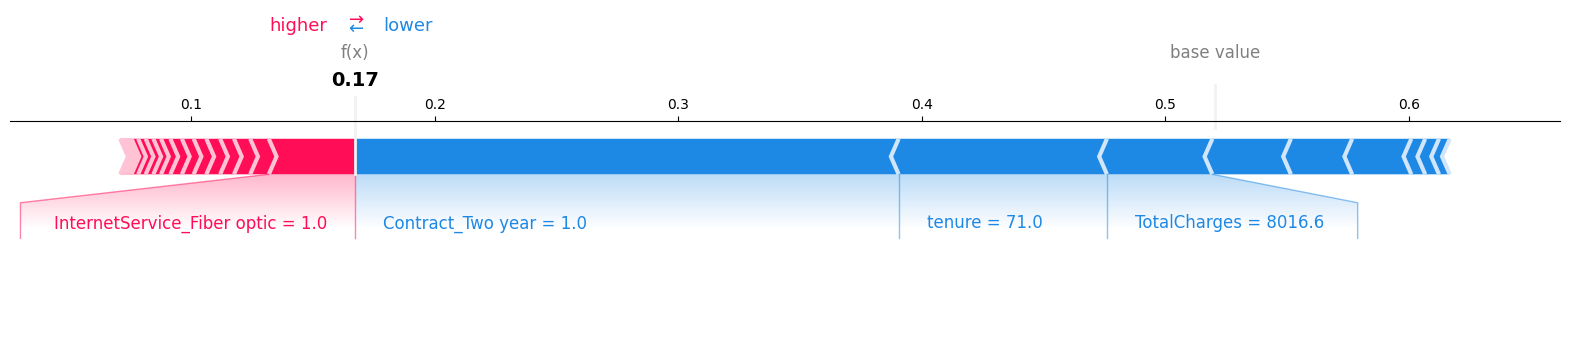

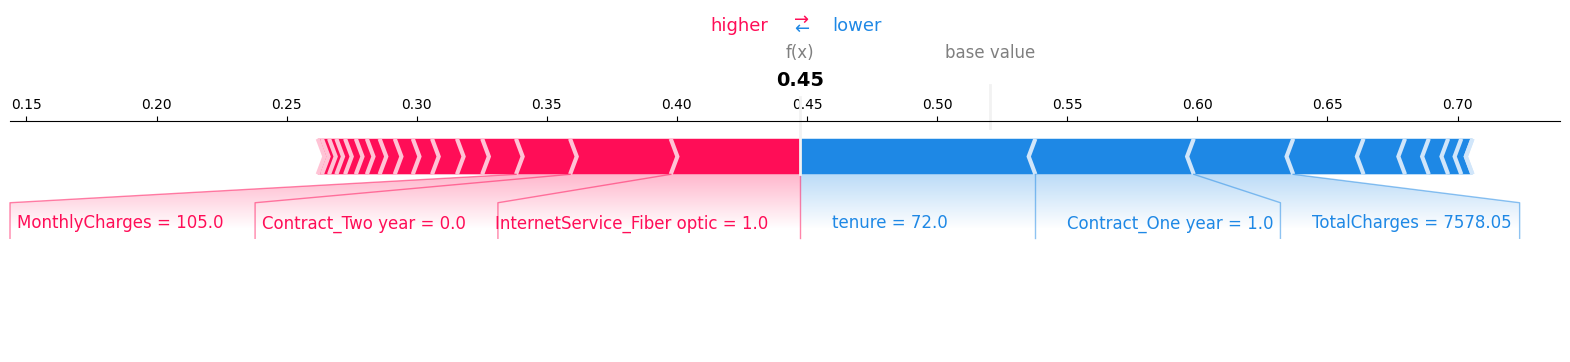

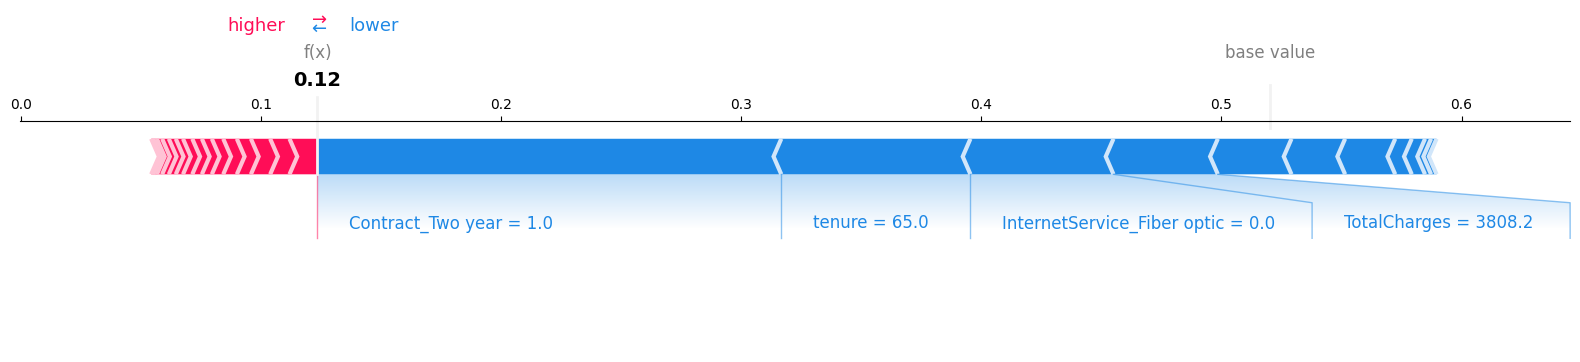

In [198]:
from IPython.display import Image, display, HTML
shap.initjs()
a = np.arange(len(Y_test))

for i in range(5):
    cust = np.random.choice(a)
    shap.force_plot(explainer.expected_value[1],shap_values[1][cust, :],X_test_onehot.iloc[cust, :],matplotlib=True)


# Churn Probability and Revenue at Risk

In [199]:
Y_test_df= pd.DataFrame(Y_test, columns=['Churn'])
num_churners=len(Y_test_df[Y_test_df['Churn']==1])
projected_loss_test= X_test_onehot[Y_test_df['Churn']==1]['MonthlyCharges'].sum() * 12

print(f"Total number of actual churners: {round(num_churners)}")
print(f"Estimated revenue loss over 12 months due to actual churners: ${round(projected_loss_test)}")
print(f"Average revenue loss per churner: ${round(projected_loss_test/num_churners)}")

Total number of actual churners: 187
Estimated revenue loss over 12 months due to actual churners: $167365
Average revenue loss per churner: $895


In [200]:
Y_test_df_pred= pd.DataFrame(y_pred_test, columns=['Churn_pred'])
pred_churners=len(Y_test_df_pred[Y_test_df_pred['Churn_pred']==1])
print(f"Total number of predicted churners: {round(pred_churners)}")


Total number of predicted churners: 327


We can try to understand these metrics from a business standpoint by doing a cost benfit analysis, the same way we did for the validation dataset. 

Model's wins or true positives:

- The recall is 0.87. Out of all the actual positive cases, the model correctly idenfies churners 87% of the time. And the number of actual churners in the dataset is 187. So if the model identifies 87% of those (163 customers), **the potential revenue saved by the model = 0.87 * 187 * 895 = $145607.55.**

Model's losses or false negatives:
- **The cost of missed churners by the model = (1-0.87) * 187 * 895 = $21757.45**

Model's costs or false positives:

- The model maintains high recall (0.87), but this comes at the cost of precision (0.50), meaning 50% of flagged churners are actually non-churners. We need to find false positives here. **False positives = Total predicted churners-True positves= 327-163=164 customers**

So lets say the cost of retention efforts per customer could range from USD 5 to USD 50 on average in terms of offers, bundled plans etc. We can use the upper limit to find the maximum cost for retention effort per customer.

So, **the total cost of false positives = 50 * 164 = $8200**

Net profit for the company:

- **Net profit = Estimated revenue saved - total cost of false positives = 145607.55 - 8200 = $137407.55**

ROI (Return on Investment) aka how much profit you're getting compared to how much you spent:

- **ROI = (Net profit)/total cost of false positives = 137407.55/8200 = $16.75**

**ROI suggests that for every 1 USD spent for retention efforts the business saves about 16.75 USD in revenue, which is good!**

The following table summarizes our findings:

| Metric                                     | Value        |
| ----------------------------------         | ---------    |
| Recall                                     | 0.87         |
| Precision                                  | 0.50         |
| Revenue Saved (TP)                         | \$145607.55  |
| Cost of Missed Churners (FN)               | \$21757.45   |
| Cost of Unnecessary Retention (FP)         | \$8200       |
| Net Revenue Retained                       | \$137407.55  |
| ROI                                        | \~17x        |


What if the company didn’t know who will churn? Could this model help them prioritize which customers are at high financial risk? We can answer these questions using the predicted probabilities by the model we trained.

In [201]:
# Use y_prob we already found for the test dataset and can find the revenue at risk for the next 12 months for a given customer, 
# if the company does nothing for customer retention

predicted_loss= y_prob_test*12*X_test_onehot['MonthlyCharges']
total_predicted_loss= predicted_loss.sum()

print(f"estimated total revenue at risk over the next 12 months (based on model predictions): ${total_predicted_loss:0.2f}")

estimated total revenue at risk over the next 12 months (based on model predictions): $267999.81


In [202]:
X_test['CustomerID']=cust_id
X_test['revenue_at_risk'] =predicted_loss
X_test['pred_churn']=y_pred_test
X_test['pred_churn_prob']=y_prob_test

X_test_onehot['CustomerID']=cust_id
X_test_onehot['revenue_at_risk'] =predicted_loss
X_test_onehot['pred_churn']=y_pred_test
X_test_onehot['pred_churn_prob']=y_prob_test

X_test_top10=X_test.sort_values(by=['revenue_at_risk'],ascending=False)[:10]
X_test_top10_onehot=X_test_onehot.sort_values(by=['revenue_at_risk'],ascending=False)[:10]

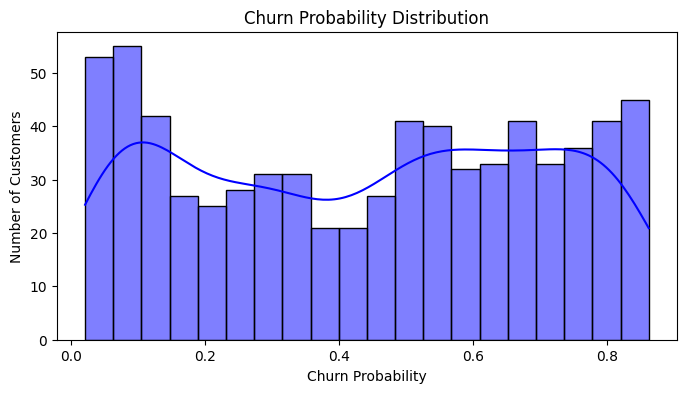

In [203]:
plt.figure(figsize=(8, 4))
sns.histplot(X_test['pred_churn_prob'],bins=20,kde=True,color='blue')
plt.title("Churn Probability Distribution")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.show()


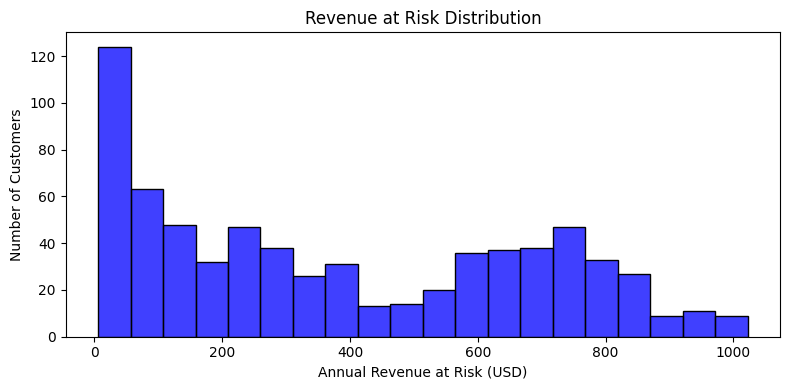

In [204]:
plt.figure(figsize=(8, 4))
sns.histplot(X_test['revenue_at_risk'],bins=20,color='blue')
plt.title("Revenue at Risk Distribution")
plt.xlabel("Annual Revenue at Risk (USD)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

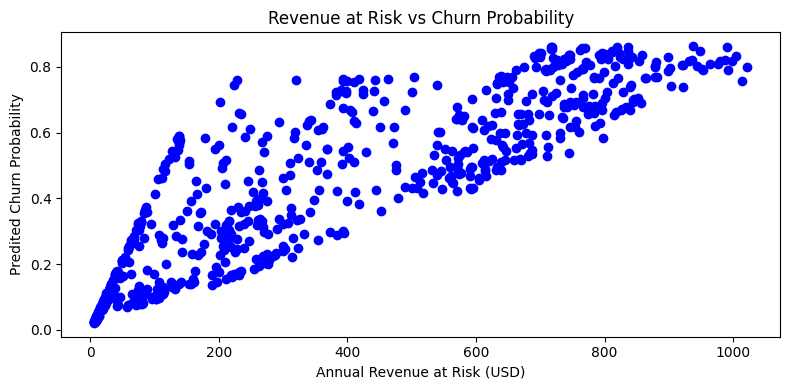

In [205]:
plt.figure(figsize=(8, 4))
plt.scatter(X_test['revenue_at_risk'],X_test['pred_churn_prob'],c='blue')
plt.title("Revenue at Risk vs Churn Probability")
plt.xlabel("Annual Revenue at Risk (USD)")
plt.ylabel("Predited Churn Probability")
plt.tight_layout()
plt.show()

Based on the above three plots, we can make the following conclusions:

- Churn risk is spread across the customer base with no sharp peaks, indicating that churners are not concentrated in one segment. This is because we fine tuned the model for high recall. This ensures most actual churners are identified, even if it results in many customers receiving moderately high churn scores.
  
- Most customers are on low-cost plans, leading to a right-skewed revenue distribution. A small number of high-paying customers contribute a large share of the total revenue at risk. This means not all churn is equally costly. When two customers have the same churn probability, the one generating more revenue should be prioritized for retention.

- There’s a clear upward trend between churn probability and revenue at risk. There is a clear gap/segmentation at around 500 USD annual revenue per customer. Customers contributing over $500 annually show both high churn risk and high revenue loss potential. This makes them the most critical segment to retain, and suggests that the company should focus on targeted offers or interventions in this tier.
 

# Segment-Level Churn Insights

Based on the above insights we can divide our customers into two tiers. 

- High tier : Those are on > 500$ annual plans.
  
- Low tier : Those are on < 500$ annual plans.

We can also divide them further based on their churn risk:
- High risk : Those with churn probability > 0.5
  
- Low risk : Those with churn probability < 0.5

Among all the customers, what share of at-risk revenue comes from high-tier vs low-tier customers?


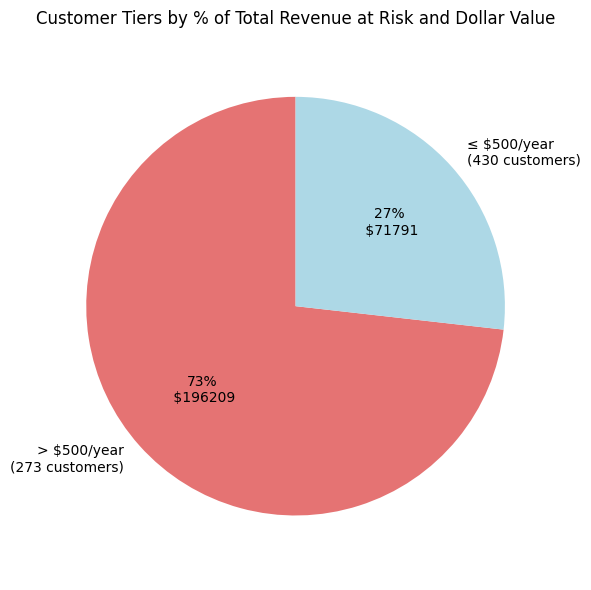

In [206]:
# Revenue risk by customer tier

rev_risk_gr_500= X_test['revenue_at_risk'][X_test['revenue_at_risk']>500].sum()
rev_risk_le_500= X_test['revenue_at_risk'][X_test['revenue_at_risk']<= 500].sum()

count_cust_gr_500=len(X_test['revenue_at_risk'][X_test['revenue_at_risk']>500])
count_cust_le_500=len(X_test['revenue_at_risk'][X_test['revenue_at_risk']<=500])

labels = [f'> $500/year\n({count_cust_gr_500} customers)',f'≤ $500/year\n({count_cust_le_500} customers)']

sizes = [rev_risk_gr_500, rev_risk_le_500]
colors = ['#E57373','#ADD8E6']

def label_func(pct):
    value = int(round(pct/100 * total_predicted_loss))
    return f'{pct:.0f}%\n ${value:}'
    
plt.figure(figsize=(6, 6))
plt.pie(sizes,labels=labels,colors=colors,autopct=label_func,startangle=90)
plt.title('Customer Tiers by % of Total Revenue at Risk and Dollar Value')
plt.axis('equal')
plt.tight_layout()
plt.show()

### High Risk Customers

Among only high-risk customers, what share of at-risk revenue comes from high-tier vs low-tier customers?

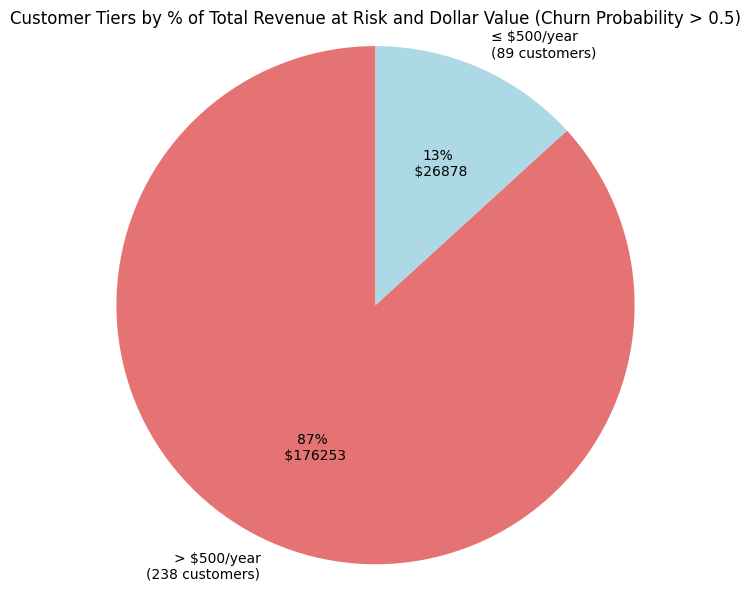

In [207]:
rev_risk_gr_500= X_test['revenue_at_risk'][(X_test['revenue_at_risk']>500)&(X_test['pred_churn_prob']>0.5)].sum()
rev_risk_le_500= X_test['revenue_at_risk'][(X_test['revenue_at_risk']<= 500)&(X_test['pred_churn_prob']>0.5)].sum()
total_predicted_loss_thresh=rev_risk_gr_500+rev_risk_le_500

count_cust_gr_500=len( X_test['revenue_at_risk'][(X_test['revenue_at_risk']>500)&(X_test['pred_churn_prob']>0.5)])
count_cust_le_500=len(X_test['revenue_at_risk'][(X_test['revenue_at_risk']<= 500)&(X_test['pred_churn_prob']>0.5)])

labels = [f'> $500/year\n({count_cust_gr_500} customers)',f'≤ $500/year\n({count_cust_le_500} customers)']

sizes = [rev_risk_gr_500, rev_risk_le_500]
colors = ['#E57373','#ADD8E6']

def label_func(pct):
    value = int(round(pct/100 * total_predicted_loss_thresh))
    return f'{pct:.0f}%\n ${value:}'
    
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels,colors=colors,autopct=label_func,startangle=90)
plt.title('Customer Tiers by % of Total Revenue at Risk and Dollar Value (Churn Probability > 0.5)')
plt.axis('equal')
plt.tight_layout()
plt.show()

Among high-risk churners (probability > 0.5), those paying > $500/year contribute 87% of the total revenue at risk. **Targeting this population helps the company prevent a revenue loss of USD 176253 per year.**

We can dig deeper into what the driving factors are behind churn for this population. We can start by looking into box plots of categorical variables against the predicted churn probabilities for insights.

### High Risk High Tier Customers (HRHT)

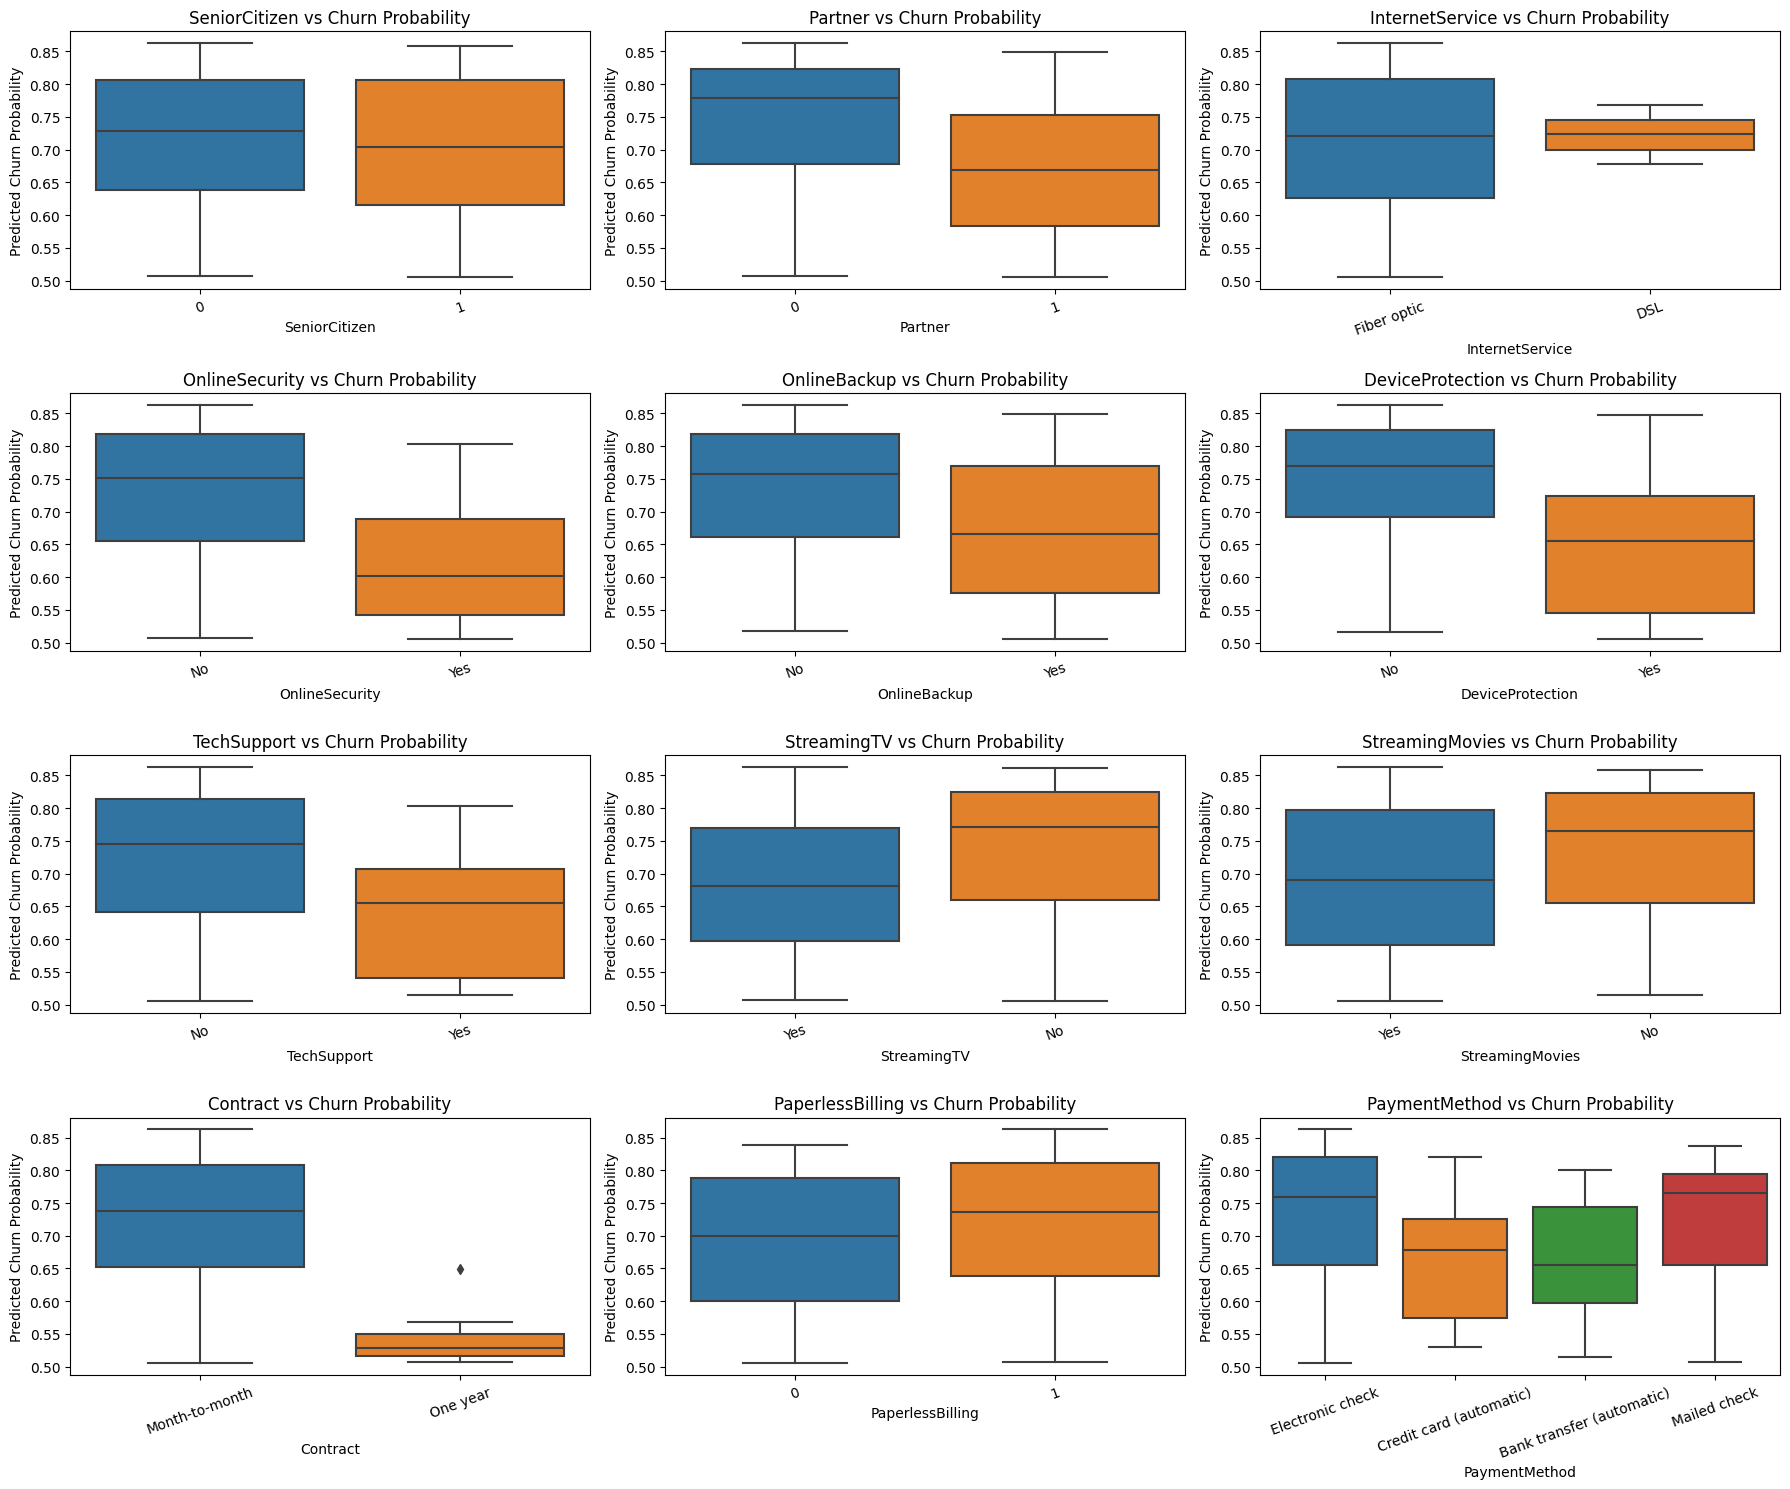

In [208]:
# Save the high risk customers in a new dataframe
X_test_high_risk_high_tier=X_test[(X_test['revenue_at_risk']>500)&(X_test['pred_churn_prob']>0.5)]

#select the binary and categorical variables
cat_cols = X_test_high_risk_high_tier.select_dtypes(include=['int64','object']).columns
dumm=['pred_churn','tenure','CustomerID','Dependents'] 
cat_cols = [col for col in cat_cols if col not in dumm] # exclude columns that are irrelevant and continuous

fig, axes = plt.subplots(4, 3, figsize=(18, 15))
ax = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(x=X_test_high_risk_high_tier[col], y=X_test_high_risk_high_tier['pred_churn_prob'],ax=ax[i])
    ax[i].set_title(f"{col} vs Churn Probability")
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Predicted Churn Probability")
    ax[i].tick_params(axis='x', rotation=20)
    
plt.tight_layout()
plt.show()


We can conclude some interesting insights about high-risk, high-tier customers from these plots:

- Contract type, as we saw before, is the number one driving factor for churn. In the high-risk category, those with month-to-month contracts show a clear tendency to leave early.

- Age doesn’t seem to be an important factor among high-risk customers. Both younger individuals and senior citizens have similar churn probability distributions.

- Customers who don’t opt for device protection, online security, tech support, online backup, and streaming services tend to have higher churn risk.

- Partnered users tend to be more loyal, potentially due to shared usage or household-level decision-making.

- Those who opt for automatic payments tend to be more loyal compared to those who use electronic or mailed checks. The latter might include individuals less familiar with technology.

- All high tier high risk customers have internet connection. While the median churn probability is similar between fiber optic and DSL users in the high-risk, high-tier segment, fiber optic users have a wider spread in churn probability. This suggests greater volatility and a higher risk of churn among that group.



We can further group the customers based on tenure and their contract type since both of these are the top two factors driving churn as seen from SHAP and the other analyses. After grouping, we can find the average churn probabilities in each categories along with the revenue at risk for the high risk high tier customers.

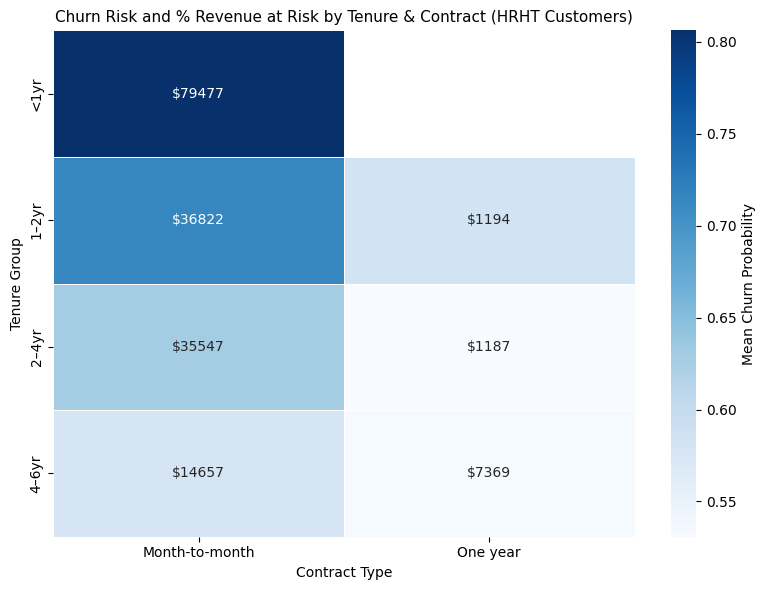

In [209]:
tot_revenue_at_risk_hrht=176253
X_test_high_risk_high_tier['tenure_group'] = pd.cut(X_test_high_risk_high_tier['tenure'], bins=[0, 12, 24, 48, 72], labels=['<1yr','1–2yr','2–4yr','4–6yr'])

X_test_high_risk_high_tier_grouped = X_test_high_risk_high_tier.groupby(['Contract','tenure_group']).agg(avg_churn_prob=('pred_churn_prob','mean'),
                                            total_revenue_at_risk=('revenue_at_risk','sum'),n_customers=('pred_churn_prob','count')).reset_index()
heatmap_vals = X_test_high_risk_high_tier_grouped.pivot_table(index='tenure_group',columns='Contract',values='avg_churn_prob')
revenue_labels = X_test_high_risk_high_tier_grouped.pivot_table(index='tenure_group',columns='Contract',values='total_revenue_at_risk')
frac_revenue= revenue_labels.applymap(lambda x: f"${round(x):}")

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_vals,annot=frac_revenue,fmt='',cmap='Blues',linewidths=0.5,cbar_kws={'label':'Mean Churn Probability'})
plt.title("Churn Risk and % Revenue at Risk by Tenure & Contract (HRHT Customers)",fontsize=11)
plt.xlabel("Contract Type")
plt.ylabel("Tenure Group")
plt.tight_layout()
plt.show()


Since customers with less than 1 year of tenure and those on month-to-month contracts are more likely to churn and their departure could result in a revenue loss of around $80,000, targeted retention strategies should be implemented immediately. 


In [210]:
# multi_cat_cols = ['TechSupport', 'OnlineSecurity', 'DeviceProtection', 'OnlineBackup','StreamingTV', 'StreamingMovies', 'Partner', 'SeniorCitizen',
#                   'InternetService', 'PaymentMethod']

# fig, axes = plt.subplots(5, 2, figsize=(20, 20))
# ax = axes.flatten()

# for i, col in enumerate(multi_cat_cols):
#     hrht_target_df[col].value_counts(normalize=True).sort_values().plot(kind='barh',ax=ax[i],color='#6699CC')
#     ax[i].set_title(f"{col} Distribution of HRHT (<1yr, Month-to-Month) Customers",fontsize=14)
#     ax[i].set_xlabel("Proportion")
#     ax[i].tick_params(axis='y',labelrotation=45)

# plt.suptitle("Feature Distribution in HRHT (<1yr, Month-to-Month) Segment", fontsize=14)
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()


### High Risk Low Tier Customers (HRLT)

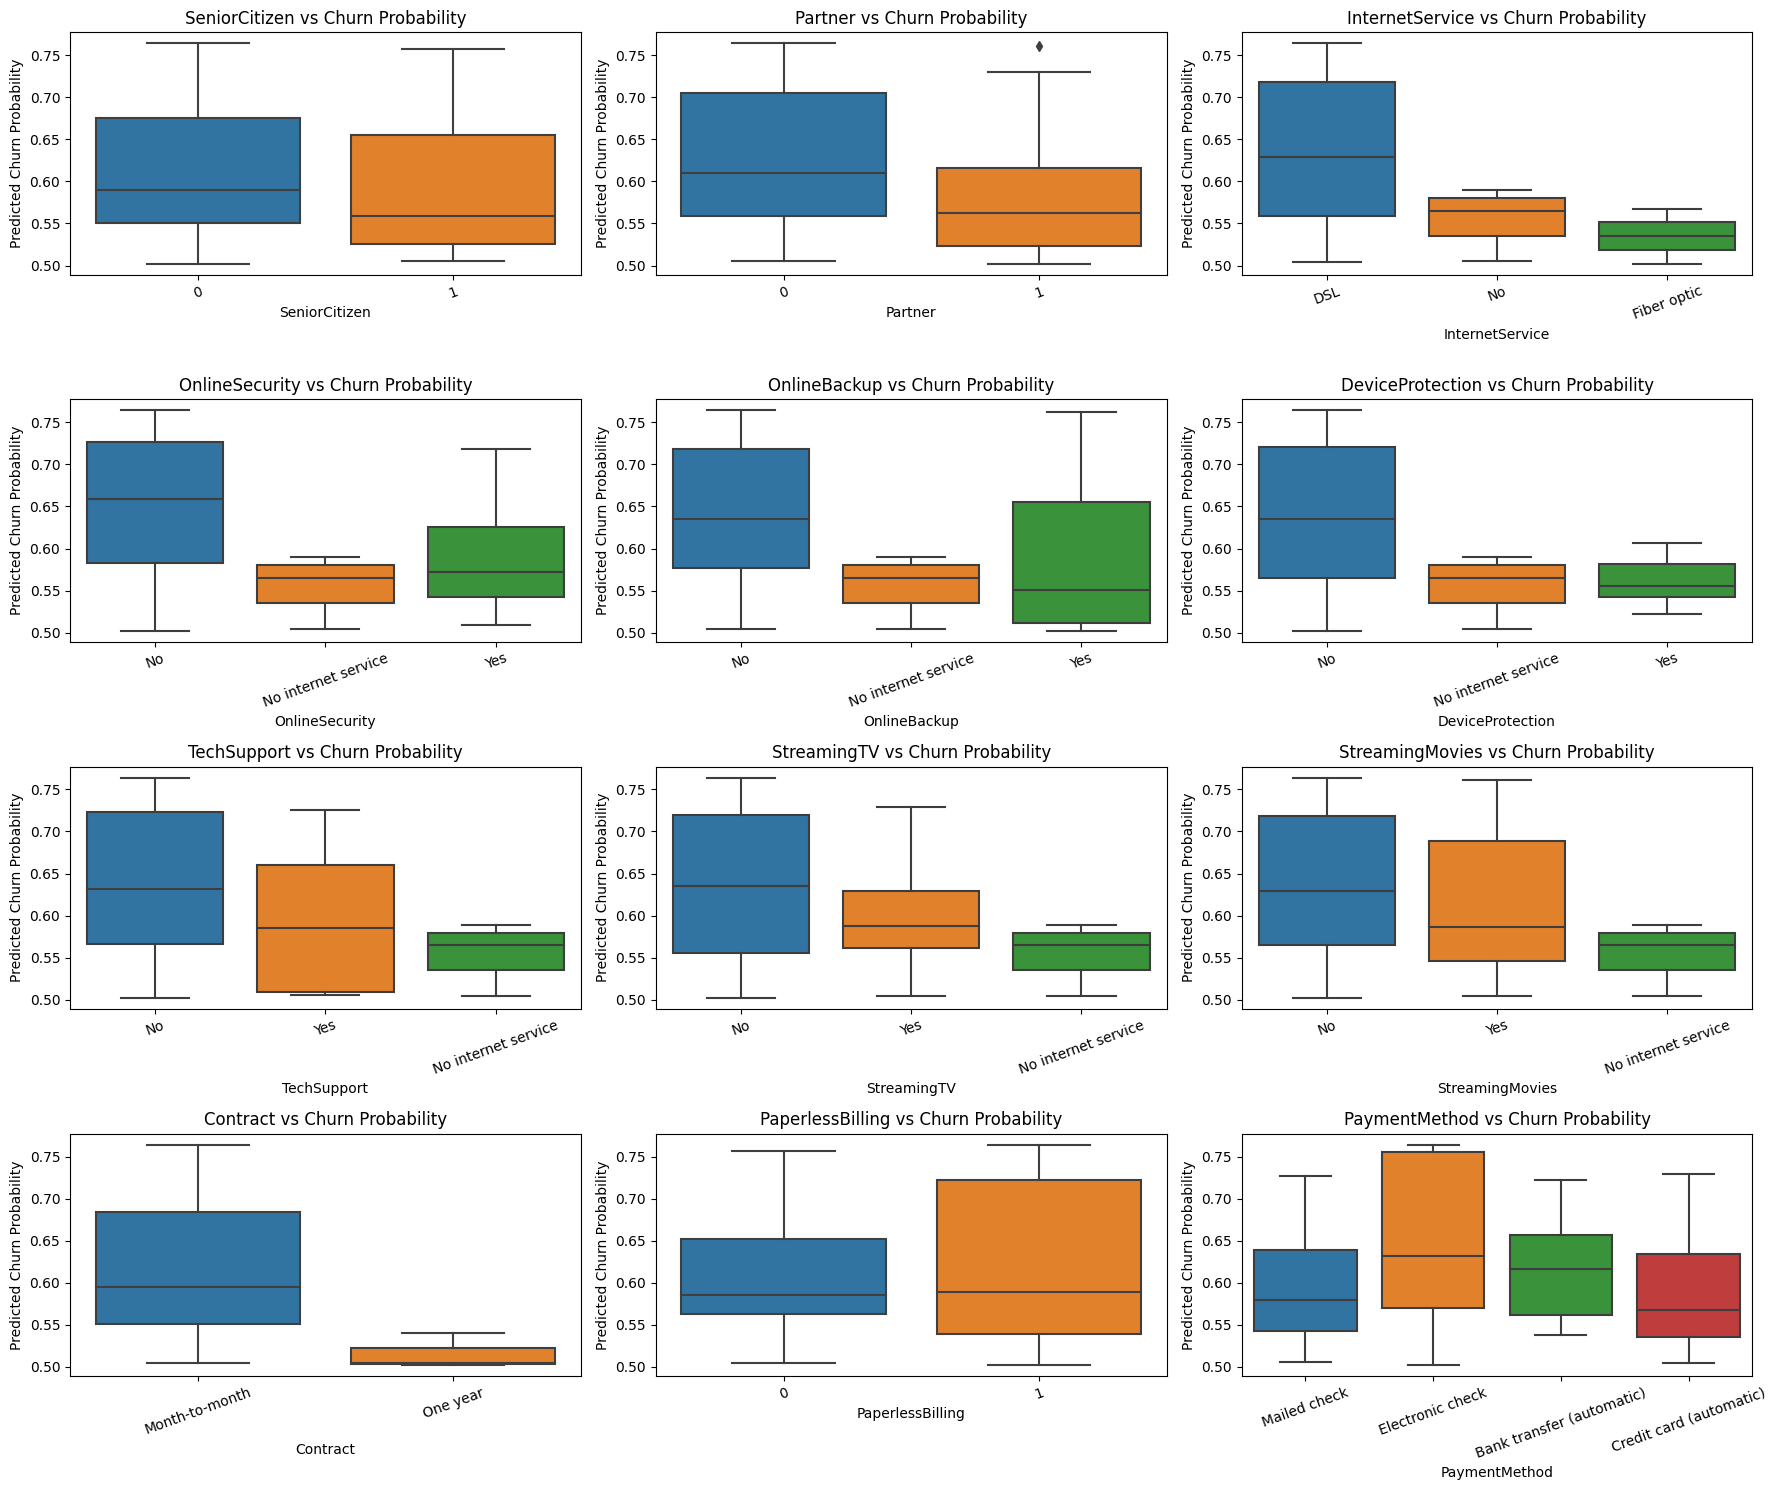

In [211]:
# Save the high risk customers in a new dataframe
X_test_low_tier_high_risk=X_test[(X_test['revenue_at_risk']<500)&(X_test['pred_churn_prob']>0.5)]

#select the binary and categorical variables
cat_cols = X_test_low_tier_high_risk.select_dtypes(include=['int64','object']).columns
dumm=['pred_churn','tenure','CustomerID','Dependents'] 
cat_cols = [col for col in cat_cols if col not in dumm] # exclude columns that are irrelevant and continuous

fig, axes = plt.subplots(4, 3, figsize=(18, 15))
ax = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(x=X_test_low_tier_high_risk[col], y=X_test_low_tier_high_risk['pred_churn_prob'],ax=ax[i])
    ax[i].set_title(f"{col} vs Churn Probability")
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Predicted Churn Probability")
    ax[i].tick_params(axis='x', rotation=20)
    
plt.tight_layout()
plt.show()


These are the customers who are likely to churn but helps generate low average revenue. Though less profitable individually, their churn volume can impact total revenue.

Based on the above plot, we can conclude the following:

- Contract type again plays a major role. Almost all high-risk low-tier customers are on month-to-month contracts, reinforcing its importance as a churn driver across customer tiers.

- Most of these customers do not have optional services like Online security, Online backup, Device protection, Tech support and Streaming services. 

- Electronic check users are more dominant in this group same as the high customer tier.

To summarize, we found:

- Total predicted revenue at risk (next 12 months): $267,999.81
(Based on churn_prob × MonthlyCharges × 12 across all test customers)
- Among all the customers on test dataset, we divided them into two tiers - High Risk High Tier and High Risk Low Tier.
  
- We identified 238 High-Risk High-Tier (HRHT) customers who are those with a predicted churn probability above 0.5 and annual revenue over $500. This segment:

   * Represents ~66% of the total predicted revenue at risk across all customers

   * Contributes ~87% of the revenue at risk among high-risk customers

These insights make HRHT customers the most financially impactful group to target for retention efforts.

Based on model predictions and churn probability analysis, I recommend the following actions:

- Target HRHT customers with personalized retention offers such as discounts or loyalty perks bundled service upgrades (e.g., tech support, device protection, online security/backup) and free streaming services in exchange for switching to annual contracts.
  
- Offer discounted or free services only for customers who switch from month-to-month to yearly plans.

- Since partnered customers are less likely to churn, offer family or referral discounts to single customers to encourage group subscriptions.

- Offer small one-time discounts for switching to automatic payment, which correlates with longer tenure, or give them 5$ off from their monthly bill for enrolling. 

 
Return On Investment (Real-World Scenario)

Assuming:

    Retention cost = $50 per customer

    Retention success rate = 40% of HRHT customers

    Revenue at risk from HRHT = $176,253

Then:

    Retention cost = 238 × $50 = $11,900

    Revenue saved = 0.4 × $176,253 = $70,501

    Net profit = $70,501 - $11,900 = $58,601

    ROI = $58,601 / $11,900 ≈ 5x
    

- In an ideal case (based on precision/recall evaluation on the test set), the model yields an estimated ROI of 17x, assuming we know which customers will actually churn.

- In practice, without access to true churn labels, targeting HRHT customers still offers a conservative ROI of ~5x, even if only 40% are actually retained.

Considering model precision ≈ 50%, around half of the HRHT customers may not churn:

    False positives ≈ 119 customers

    Wasted retention effort = 119 × $50 = $5,950

- This is about 50% of the retention spend, but still results in positive ROI.
    
So this model is useful not just for predicting churn, but for helping the company focus on the right customers, i.e., those whose churn would hurt the business the most.

If one wants to improve the precision further, raising the threshold for classification (default at 0.5) could help but at the cost of reducing recall. 

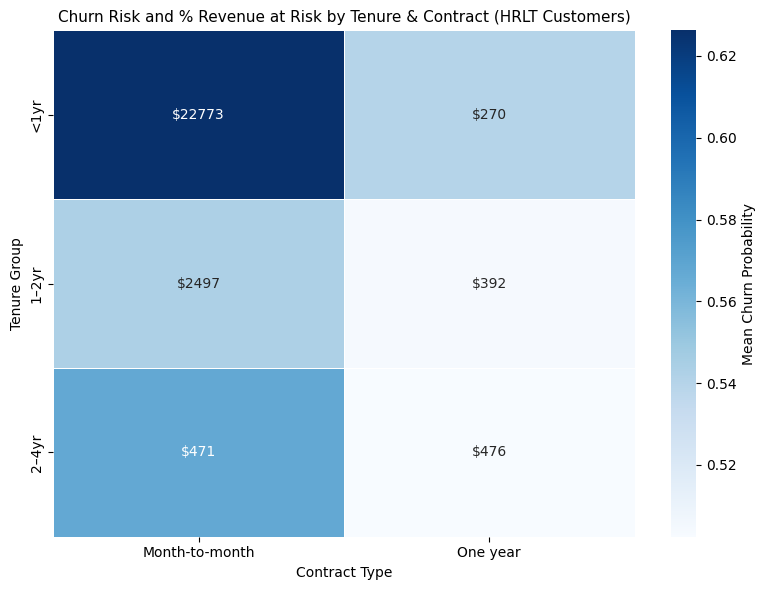

In [213]:
X_test_low_tier_high_risk['tenure_group'] = pd.cut(X_test_low_tier_high_risk['tenure'], bins=[0, 12, 24, 48, 72], labels=['<1yr','1–2yr','2–4yr','4–6yr'])

X_test_low_tier_high_risk_grouped = X_test_low_tier_high_risk.groupby(['Contract','tenure_group']).agg(avg_churn_prob=('pred_churn_prob','mean'),
                                            total_revenue_at_risk=('revenue_at_risk','sum'),n_customers=('pred_churn_prob','count')).reset_index()

X_test_low_tier_high_risk_grouped = X_test_low_tier_high_risk_grouped.dropna()

heatmap_vals = X_test_low_tier_high_risk_grouped.pivot_table(index='tenure_group',columns='Contract',values='avg_churn_prob')
revenue_labels = X_test_low_tier_high_risk_grouped.pivot_table(index='tenure_group',columns='Contract',values='total_revenue_at_risk')
frac_revenue= revenue_labels.applymap(lambda x: f"${round(x):}")

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_vals,annot=frac_revenue,fmt='',cmap='Blues',linewidths=0.5,cbar_kws={'label':'Mean Churn Probability'})
plt.title("Churn Risk and % Revenue at Risk by Tenure & Contract (HRLT Customers)",fontsize=11)
plt.xlabel("Contract Type")
plt.ylabel("Tenure Group")
plt.tight_layout()
plt.show()


# Actionable Insights for Customer Retention



#### To summarize, we found:

- Total predicted revenue at risk (next 12 months): $267,999.81 (Based on churn_prob × MonthlyCharges × 12 across all test customers)

- Among all the customers on test dataset, we divided them into two tiers - High Risk High Tier and High Risk Low Tier.

- We identified 238 High-Risk High-Tier (HRHT) customers who are those with a predicted churn probability above 0.5 and annual revenue over $500. This segment:

  - Represents ~66% of the total predicted revenue at risk across all customers

  - Contributes ~87% of the revenue at risk among high-risk customers

These insights make HRHT customers the most financially impactful group to target for retention efforts.

Based on model predictions and churn probability analysis, I recommend the following actions:

- Target HRHT customers with personalized retention offers such as discounts or loyalty perks bundled service upgrades (e.g., tech support, device protection, online security/backup) and free streaming services in exchange for switching to annual contracts.

- Offer discounted or free services only for customers who switch from month-to-month to yearly plans.

- Since partnered customers are less likely to churn, offer family or referral discounts to single customers to encourage group subscriptions.

- Offer small one-time discounts for switching to automatic payment, which correlates with longer tenure, or give them 5$ off from their monthly bill for enrolling.

#### Return On Investment (Real-World Scenario)

Assuming:
    
    Retention cost = $50 per customer
    
    Retention success rate = 40% of HRHT customers
    
    Revenue at risk from HRHT = $176,253

Then:

    Retention cost = 238 × $50 = $11,900
    
    Revenue saved = 0.4 × $176,253 = $70,501
    
    Net profit = $70,501 - $11,900 = $58,601
    
    ROI = $58,601 / $11,900 ≈ 5x

- In an ideal case (based on precision/recall evaluation on the test set), the model yields an estimated ROI of 17x, assuming we know which customers will actually churn.

- In practice, without access to true churn labels, targeting HRHT customers still offers a conservative ROI of ~5x, even if only 40% are actually retained.

Considering model precision ≈ 50%, around half of the HRHT customers may not churn:
    
    False positives ≈ 119 customers
    
    Wasted retention effort = 119 × $50 = $5,950

- This is about 50% of the retention spend, but still results in positive ROI.

So this model is useful not just for predicting churn, but for helping the company focus on the right customers — those whose churn would hurt the business the most.

If one wants to improve the precision further, raising the threshold for classification (default at 0.5) could help but at the cost of reducing recall.
